# Case 1 - Hotel customer segmentation 

Alexandre - 20240568 <br>
Diogo Melo - 20240698 <br>
Gonçalo Varanda - 20240691 <br>
Miguel Ferreira - 20240569



>This Notebook uses the "Case1_HotelCustomerSegmentation.csv" dataset

### Dataset description:

Dataset of a Hotel in Portugal, with information and preferences regarding customer bookings.

#### Hotel client data
- `ID`: numeric - Customer ID
- `age`: numeric - age of the customer
- `namehash`: hash of the customer's name (categorical)
- `docIDhash`: hash of the customer’s personal document identification number (usually a passport or ID card) (categorical)
- `nationality`: nationality of the customer in ISO 3166-1 (Alpha 3) format (categorical)

#### Related with the bookings
- `AverageLeadTime`: numeric - Average number of days before arrival date the customer makes bookings
- `LodgingRevenue`: numeric - Total amount of lodging revenue paid by the customer so far
- `OtherRevenue`: numeric - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- `PersonNights`: numeric - Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights(Length-of-stay) of the booking
- `RoomNights`: numeric - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- `DistributionChannel`: Distribution channel normally used by the customer to make bookings at the hotel (categorical: 'Corporate','Travel Agent/Operator','Direct','GDS Systems')
- `MarketSegment`: Current market segment of the customer (categorical: 'Corporate','Travel Agent/Operator','Direct','Aviation','Groups','Complementary','Other')
- `BookingsCanceled`: numeric - Number of bookings the customer made but subsequently canceled
- `BookingsNoShowed`: numeric - Number of bookings the customer made but subsequently made a "no-show"
- `BookingsCheckedin`: numeric - Number of bookings the customer made, which actually ended up staying

#### Preferences (Indication if the customer usually asks for a...)
- `SRHighFloor`: room in a higher floor (0: No, 1: Yes)
- `SRLowFloor`: room in a lower floor (0: No, 1: Yes) 
- `SRAccessibleRoom`: accessible room (0: No, 1: Yes) 
- `SRMediumFloor`: room in a middle floor (0: No, 1: Yes)
- `SRBathtub`: room with a bathtub (0: No, 1: Yes)
- `SRShower`: room with a shower (0: No, 1: Yes)
- `SRCrib`: crib (0: No, 1: Yes) 
- `SRKingSizeBed`: room with a king size bed (0: No, 1: Yes)
- `SRTwinBed`: room with a twin bed (0: No, 1: Yes)
- `SRNearElevator`: room near the elevator (0: No, 1: Yes)
- `SRAwayFromElevator`: room away from the elevator (0: No, 1: Yes) 
- `SRNoAlcoholInMiniBar`: room with no alcohol in the mini bar (0: No, 1: Yes)
- `SRQuietRoom`: room away from the noise (0: No, 1: Yes)


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Importing the necessary libraries
    

</div>

In [391]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import ticker
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics


# encoders

# Models

# Metrics 

# Others
#%pip install pycountry
import pycountry

# for better resolution plots and others

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 2. Data Understanding
    

</div>

The group started by loading the data a using the *head* function to get a general understanding of the data.

In [392]:
# import os

# # Change directory
# os.chdir(r"C:\Users\alexr\Documents\NOVAIMS\1_ANO\BCwDS\CASE1")

In [393]:
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=';', index_col='ID')
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the start, it was possible to conclude that two columns (`NameHash`, `DocIDHash`) were very likely not to be used, due to the fact that, as the name implied, the data was hashed. The group decided to keep these columns until the data cleaning section where they could be adressed.

### Missing Data

The next step was using the *info* method, this method creates a simplistic view of the data where it is possible to take note of wrong data types (*dtypes*) and null values.

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

Two columns stoud out, `Age` and `DocIDHash`. In the case of `Age` there were various ways of fixing the missing data (e.g. fill using the average age of the customers nationality), the data type was also wrong, so it was replaced by integer. `DocIDHash` was "less problematic", as previously mentioned this variable was unlikely to be used due to its nature. 

A further table was made to simplify this view and gather an understanding of the dimension of the missing data.

In [395]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [396]:
# missing values
# make it into a table where one col is the count of missings and the next is the percentage
missing = df.isna().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing = pd.DataFrame(missing, columns=['missing'])
missing['percentage'] = missing['missing'] / df.shape[0] * 100
missing

,missing,percentage
Age,4172,3.733901
DocIDHash,1001,0.895886


### Duplicated Data

Next the group checked for duplicate data using the *duplicated* function.

In [397]:
df.duplicated().sum()

111

In [398]:
df[df[['DocIDHash', 'Nationality']].duplicated()]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
39,PRT,<NA>,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
40,PRT,<NA>,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
56,PRT,<NA>,1385,0xD27550946D0D4D9A2C8ACABC25F3EB2E71340638AB58...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,97,213.52,11.50,0,0,...,0,0,0,0,0,0,0,0,0,0
60,PRT,<NA>,1385,0xDB729ABCD594E05BE66D31E3E7A89CF84A107E637368...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,123.00,12.00,0,0,...,0,0,0,0,0,0,0,0,0,0
66,PRT,<NA>,1385,0x3E9698E7C95793528DF6AFE454C1D7D1B6E70B5AB13A...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,6,141.50,13.50,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111572,PRT,35,38,0x87E907A2D43E25D3E3D56D7016D9447D4D646CCD7CFE...,0x4AAF782C86F1B4F015C85E005271AF3FAF25AEA6DFF6...,2,113.00,12.00,0,0,...,0,0,0,0,0,0,0,0,0,0
111631,PRT,<NA>,37,0xC3B0C105F99A992FAC2D08EC52356248A665821468CF...,NaN,0,0.00,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
111634,PRT,<NA>,37,0x32E38284BCC52BC1953CC30E2E18A673C42D38F7A2E0...,NaN,0,0.00,0.00,0,0,...,0,0,0,0,1,0,0,0,0,0


There were duplicate rows that can be found trough the `DocIDHash` and `Nationality`. Duplicates were found using these two variables as they represented the two "most-unique" features in the dataset (`NameHash` isn't unique because two or more people can have the same name). These rows were adressed in the data cleaning section.

### Investigating strange values

The group used the *describe* function to look for any values that looked out of place, such as ages that where far above (or bellow) the expected range.

In [399]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,107561.0,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,2.203825,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,2.301637,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,-10.0,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.0,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.0,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.0,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.0,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The group observed the presence of negative values in the columns `Age` and `AverageLeadTime`. These values required further atention so the group decided to investigate these rows.

In [400]:
df[df["Age"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,...,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,...,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,...,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,...,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,...,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
df[df["AverageLeadTime"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
23064,PRT,<NA>,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29374,USA,25,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
51375,CHN,33,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58655,FRA,57,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58662,FRA,62,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58676,FRA,61,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
60590,ESP,46,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
62690,USA,70,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
68486,GBR,46,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In both cases the negative values amounted to a very small percentage of the data. As such the group decided that the simplest way to deal with this values was to simply remove them, this was done in the data cleaning section.

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 3. Exploratory Data Analysis
    

</div>

### General View of the Variables

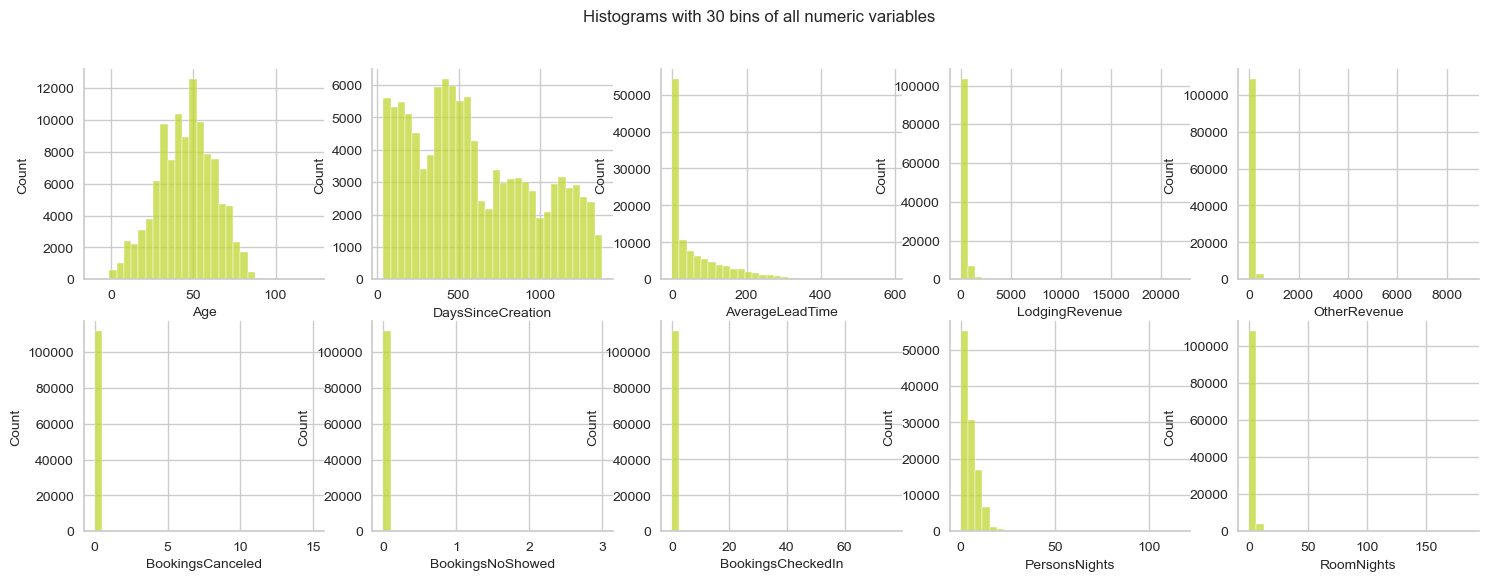

In [402]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
binary_features = df.columns[df.columns.str.startswith('SR')].tolist()
metric_features = [feature for feature in numeric_features if feature not in binary_features]
non_metric_features = df.select_dtypes(exclude=[np.number]).columns.tolist()


fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.histplot(data=df,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False,
                 color='#bfd630')
sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Histograms with 30 bins of all numeric variables", fontsize=12);

By plotting the numerical features into histograms the group managed to see how they "behaved". As was expected `Age` follows a normal distribution, centered around 50 years of age. `DaysSinceCreation` slightly decreases as the number of days gets bigger, meaning the hotel is gaing clients. There is also a noteble spike of clients around the 500 day mark. All other variables hit their peak at 0 having a big decrease or no more data in other bins. This was particularly worrying in the variables `LodgingRevenue` and `OtherRevenue` so the group decided to investigate this values further.

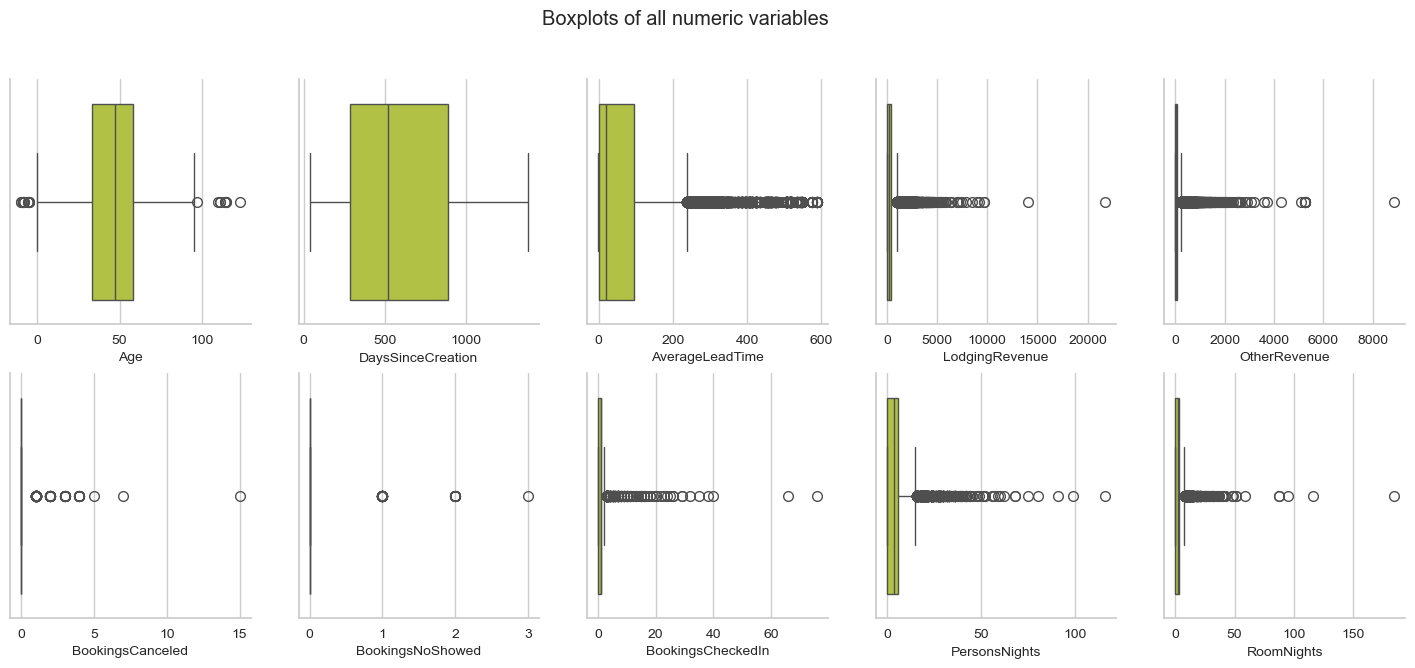

In [403]:
metric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                   'PersonsNights', 'RoomNights']


fig, ax = plt.subplots(2, 5, figsize=(18,7))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot,
                 color='#bfd630')
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplots of all numeric variables");

As for outliers, most of the variables were highly skewed to the right meaning that most of their values were very low, or more likely zeros. Judging by the boxplots there seem to be a large amount of outliers but this was something the group wanted to explore in the data cleaning section.

### Customer Age

In [404]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 100], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '+81'])

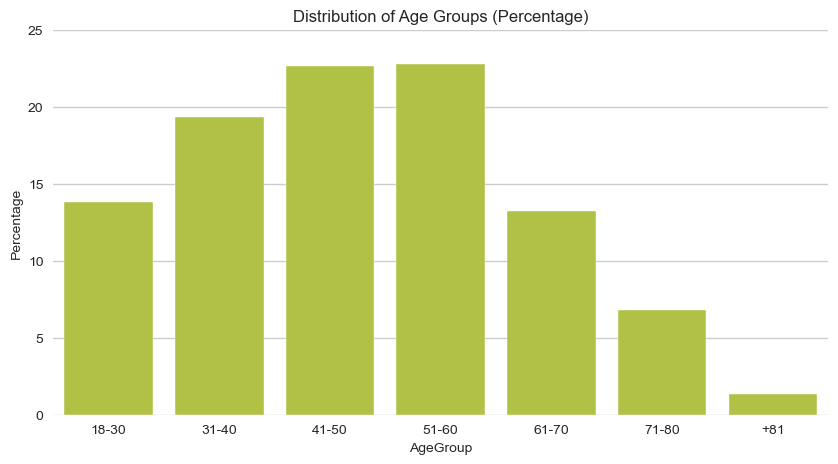

In [405]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
age_group_counts = df['AgeGroup'].value_counts(normalize=True) * 100
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='#bfd630')
plt.title('Distribution of Age Groups (Percentage)')
plt.ylabel('Percentage')
plt.ylim(0, 25)
sns.despine(left=True, bottom=True)
plt.show()

As previously seen the main client base of the hotel are clients around 50 years of age.

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\295316716.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='LodgingRevenue', color='#bfd630', ci=None)
C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\295316716.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='OtherRevenue', color='#f27405', ci=None)


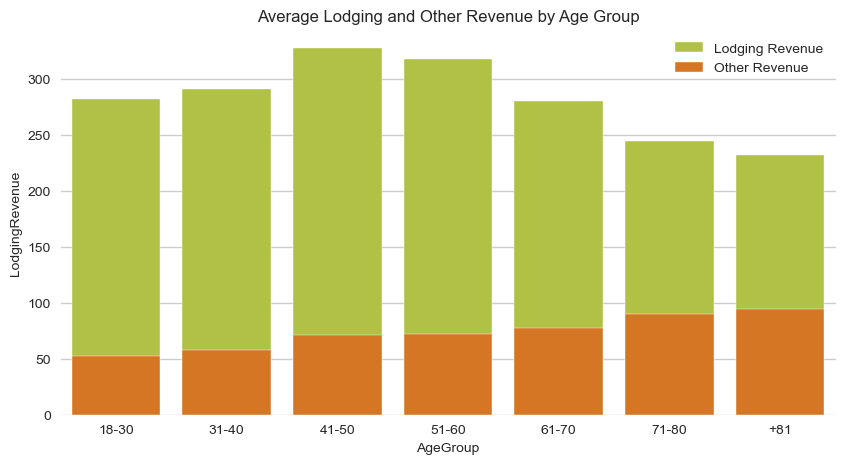

In [406]:
# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 31, 41, 51, 61, 71, 81, 101], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '+81'])

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(data=df, x='AgeGroup', y='LodgingRevenue', color='#bfd630', ci=None)
sns.barplot(data=df, x='AgeGroup', y='OtherRevenue', color='#f27405', ci=None)
plt.title('Average Lodging and Other Revenue by Age Group')
plt.legend(labels=['Lodging Revenue', 'Other Revenue'])
sns.despine(left=True, bottom=True)
plt.show()

The average other revenue seems to grow in parity with age. Lodging revenue grows until the third age group, it then starts to decrease in a slow fashion (possibly due too less interest from older customers).

**Now looking at younger customers**, in Portugal clients need to be at least 18 years of age to book an hotel room. The group decided to study the customers under this age.

In [407]:
underage_count = df[df["Age"] < 18].shape[0]
print(f"Number of customers under 18: {underage_count} \nPercentage of customers under 18: {round(underage_count / df.shape[0] * 100, 2)}%")

Number of customers under 18: 6893 
Percentage of customers under 18: 6.17%


In the dataset there were almost 7000 underage customers. If these customers have no revenue they can be considered guests that arrived with their families, but if they have revenue they need to be studied further.

In [408]:
df_underage = df[df["Age"] < 18]
underage_revenue = df_underage[['LodgingRevenue', 'OtherRevenue']].describe()
print(underage_revenue)

       LodgingRevenue  OtherRevenue
count     6893.000000   6893.000000
mean       101.973264     21.732858
std        347.731839     86.427949
min          0.000000      0.000000
25%          0.000000      0.000000
50%          0.000000      0.000000
75%          0.000000      0.000000
max       5237.100000   2012.400000


There are underage customers who have lodging and other revenue.

In [409]:
df_underage.loc[(df_underage['LodgingRevenue'] != 0) | (df_underage['OtherRevenue'] != 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup
ID,,,,,,,,,,,,,,,,,,,,,
82,ESP,4,1384,0x56A42753E724C20D97AFC90256FBB406DBEAADD0DBD8...,0xDC0D71D5D2B392DDC83D0065D409681BE9C745ECE97B...,103,653.40,759.6,0,0,...,0,0,1,1,0,0,0,0,0,NaN
353,PRT,14,1381,0x888C04C4C72349F8B571CD9A79EDB33D580F50143BD0...,0xA9EFC491B14563EBFA14008DF9A4ADB0F9E9BE7473D3...,69,555.00,154.5,0,0,...,0,0,0,0,0,0,0,0,0,NaN
682,PRT,7,1360,0xF3B6954DBC0B761324A9F09FCAB610146EBBB1C9689B...,0x00EC5AC56187FBFB71E11AE4439CA763A5857C12FB43...,4,50.00,14.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
792,MAR,14,1357,0x426868C45B26B9AB800023AD5701E3AC755847092051...,0xA72741A88993ECDB6D72C427FED25C3D885CA8D9124D...,0,202.00,63.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1083,FRA,14,1345,0x5B30B0C2488EE3CF0A1C5D5A96C344824C71FBD73F10...,0xF866B3E9123B9787D9A003763F17E0DD99173B83881A...,137,180.00,51.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110347,DEU,17,48,0xA06043F7FA09008E1A5F6873E8FDF64F32EF53A21D0D...,0xF10F7A3F018DFC36B8A24299DB1ADB8057A8B5EA084F...,204,489.80,120.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
110470,FRA,17,47,0x7FF0B44D5CE1708B25709B4C61ECCB2C28FED55216D2...,0x0481361AED23F31C3971C81D28F68B6798C317FAFE3F...,165,519.21,84.0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
110615,ESP,17,46,0x30369462F294949CC860315B0BAC6264C7873F924540...,0xEA8805DA03319E22E93D16C1C7E0A39FFA08E61ACB88...,81,1680.00,192.0,0,0,...,0,0,0,0,1,0,0,0,0,NaN


These rows could possibly have mistakes in the age, as this is the only variable that is off, they were handled in the data cleaning section.

### Booking Variables

After completing the Data Understanding the group moved to the EDA section. The first variables the group looked into were the "bookings variables".

The group wanted to look into the number of reservations that were cancled, to ahcieve this goal a table was created featuring the number of costumers that had canceled *x* bookings.

In [410]:
bookings_canceled_counts = df['BookingsCanceled'].value_counts()
bookings_canceled_percentages = (df['BookingsCanceled'].value_counts(normalize=True) * 100).round(5)
bookings_canceled_table = pd.DataFrame({
    'Count': bookings_canceled_counts,
    'Percentage': bookings_canceled_percentages
})
bookings_canceled_table = bookings_canceled_table.sort_index()
bookings_canceled_table

,Count,Percentage
BookingsCanceled,,
0,111567,99.85143
1,125,0.11187
2,19,0.01700
3,11,0.00984
4,8,0.00716
5,1,0.00089
7,1,0.00089
15,1,0.00089


From the table it was possible to conclude that the majority of clients (approximatly 99.9%) haven't canceled a booking. This is followed very losely by 1 cancelation with 125 clients (or about 0.1%).

This process was repeated for the column `BookingsNoShowed`.

In [411]:
bookings_no_showed_counts = df['BookingsNoShowed'].value_counts()
bookings_no_showed_percentages = (df['BookingsNoShowed'].value_counts(normalize=True) * 100).round(5)
bookings_no_showed_table = pd.DataFrame({
    'Count': bookings_no_showed_counts,
    'Percentage': bookings_no_showed_percentages
})
bookings_no_showed_table = bookings_no_showed_table.sort_index()
bookings_no_showed_table

,Count,Percentage
BookingsNoShowed,,
0,111676,99.94899
1,48,0.04296
2,8,0.00716
3,1,0.00089


Much like the previous table, the majority of clients have shown up for all their bookings. In this case the percentage of clients who have missed one booking is even less with 48 clients (or approximatly 0.4%)

This process was repeated for `BookingsCheckedIn`.

In [412]:
bookings_checked_in_counts = df['BookingsCheckedIn'].value_counts()
bookings_checked_in_percentages = (df['BookingsCheckedIn'].value_counts(normalize=True) * 100).round(5)
bookings_checked_in_table = pd.DataFrame({
    'Count': bookings_checked_in_counts,
    'Percentage': bookings_checked_in_percentages
})
bookings_checked_in_table = bookings_checked_in_table.sort_index()
bookings_checked_in_table

,Count,Percentage
BookingsCheckedIn,,
0,33198,29.71190
1,76474,68.44352
2,1634,1.46241
3,201,0.17989
4,57,0.05101
5,33,0.02953
6,19,0.01700
7,30,0.02685
8,12,0.01074


The group noticed that there was an unusual amount of clients without any checkins. Given that 99% of clients dont have cancelations or "no shows" a new table was made to look for clients who only had bookings checked in.

In [413]:
df1 = df.copy()
df1 = df1[(df1['BookingsCanceled'] == 0) & (df1['BookingsNoShowed'] == 0)]
bookings_checked_in_counts = df1['BookingsCheckedIn'].value_counts()
bookings_checked_in_percentages = (df1['BookingsCheckedIn'].value_counts(normalize=True) * 100).round(5)
bookings_checked_in_table = pd.DataFrame({
    'Count': bookings_checked_in_counts,
    'Percentage': bookings_checked_in_percentages
})
bookings_checked_in_table = bookings_checked_in_table.sort_index()
bookings_checked_in_table

,Count,Percentage
BookingsCheckedIn,,
0,33197,29.76375
1,76416,68.51302
2,1598,1.43273
3,189,0.16945
4,46,0.04124
5,27,0.02421
6,10,0.00897
7,16,0.01435
8,8,0.00717


This table presented an interesting insight, about 30% of the clients in the data base hadn't ever checked into a booking. With this in mind the group proposed three possibilities:

**1.** These are data entry errors. This outcome seemed unlikely due to the sheer volume of clients without checkins.

**2.** These were clients who had given their data in the hotel's website, to a travel aggency or directly to the hotel and ultimatly decided no to book a room. These clients (or at least the ones who had 0's in all "booking variables") could be clients who gave up on the hotel.

**3.** These were clients who could, for example, belong to a mailing list, or a loyalty program but never made any bookings. If this was true then these customers would be leads/potential customers.

Next the group decided to study how the various booking variables behaved within each of the existing market segments.

In [414]:
market_analysis = df.groupby('MarketSegment')[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']].sum()
market_analysis['Total_Bookings'] = market_analysis.sum(axis=1)
market_analysis['Cancel_Rate'] = (market_analysis['BookingsCanceled'] / market_analysis['Total_Bookings']) * 100
market_analysis['NoShow_Rate'] = (market_analysis['BookingsNoShowed'] / market_analysis['Total_Bookings']) * 100
market_analysis.sort_values('Cancel_Rate', ascending=False)

,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,Total_Bookings,Cancel_Rate,NoShow_Rate
MarketSegment,,,,,,
Aviation,21,7,421,449,4.677060,1.559020
Complementary,32,0,750,782,4.092072,0.000000
Corporate,158,50,4228,4436,3.561767,1.127142
Direct,29,6,11351,11386,0.254699,0.052696
Travel Agent/Operator,5,4,12234,12243,0.040840,0.032672
Groups,3,0,9364,9367,0.032027,0.000000
Other,7,0,44067,44074,0.015882,0.000000


From the table it is possible to conclude that there are 3 segments who feature unusually high cancel rates, two of which also feature high "no show" rates, those being "Aviation", "Complementary" (this being the one that does not present a high "no show" rate) and "Corporate".

### `PersonNights`
`PersonNights` was created using the following formula:

$$
\text{PersonNights} = (\text{Number of Adults} + \text{Number of Children}) \times \text{Number of Nights}
$$

A high `PersonNights` value might represent guests who stayed longer or in larger groups, which could translate into higher revenue from hotel services.


In [415]:
persons_nights_description = df['PersonsNights'].describe().reset_index()
persons_nights_description.columns = ['Statistic', 'Value']
persons_nights_description

,Statistic,Value
0,count,111733.000000
1,mean,4.328318
2,std,4.630739
3,min,0.000000
4,25%,0.000000
5,50%,4.000000
6,75%,6.000000
7,max,116.000000


On average the value of the `PersonNights` is about 4 but when looking at the minimum and the first quartile values it was possible to conclude that there were about 25% of customers with a 0 `PersonNights`. This could only mean that these clients did not spend any night at the hotel. This is due to the fact that in the formula, the first part (*Number of Adults + Number of Children*) has to be at least 1. The maximum value is also note worthy as it stands out from the maximum by more then 100 `PersonNights`.

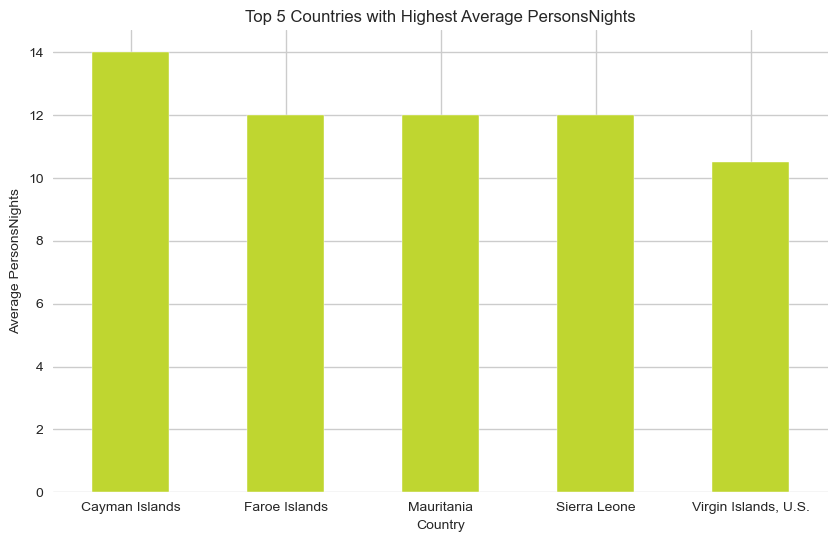

In [416]:
def get_country_name(alpha3_code):
    try:
        return pycountry.countries.get(alpha_3=alpha3_code).name
    except AttributeError:
        return 'Unknown code'

avg_persons_nights_by_nationality = df.groupby('Nationality')['PersonsNights'].mean()
top_5_countries_persons_nights = avg_persons_nights_by_nationality.nlargest(5)
top_5_countries_persons_nights.index = top_5_countries_persons_nights.index.map(get_country_name)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
top_5_countries_persons_nights.plot(kind='bar', color='#bfd630')
plt.title('Top 5 Countries with Highest Average PersonsNights')
plt.xlabel('Country')
plt.ylabel('Average PersonsNights')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.show()

In [417]:
top_5_countries_persons_nights = avg_persons_nights_by_nationality.nlargest(5)
top_5_countries_rows = df[df['Nationality'].isin(top_5_countries_persons_nights.index)]
top_5_countries_rows_count = top_5_countries_rows['Nationality'].value_counts()
top_5_countries_rows_count.index = top_5_countries_rows_count.index.map(get_country_name)
top_5_countries_rows_count

Nationality
Sierra Leone            2
Cayman Islands          2
Virgin Islands, U.S.    2
Mauritania              1
Faroe Islands           1
Name: count, dtype: int64

### `RoomNights `

`RoomNights` is given by the following formula:

$$
\text{RoomNights} = \text{Number of Rooms} \times \text{Number of Nights}
$$

In [418]:
room_nights_description = df['RoomNights'].describe().reset_index()
room_nights_description.columns = ['Statistic', 'Value']
room_nights_description

,Statistic,Value
0,count,111733.000000
1,mean,2.203825
2,std,2.301637
3,min,0.000000
4,25%,0.000000
5,50%,2.000000
6,75%,3.000000
7,max,185.000000


`RoomNights` behaved simmilarly to the previous variable. Its mean and std were both approximatly 2, the minimum and first quartile were 0, and the maximum was further away from the 75% quarter then the previous variable was. Again these values reflected that a quarter of the clients hadn't booked a room.

The findings from these two variables furthered the groups belief in the theory that this database had clients who had not made a booking and were leads/potential customers.

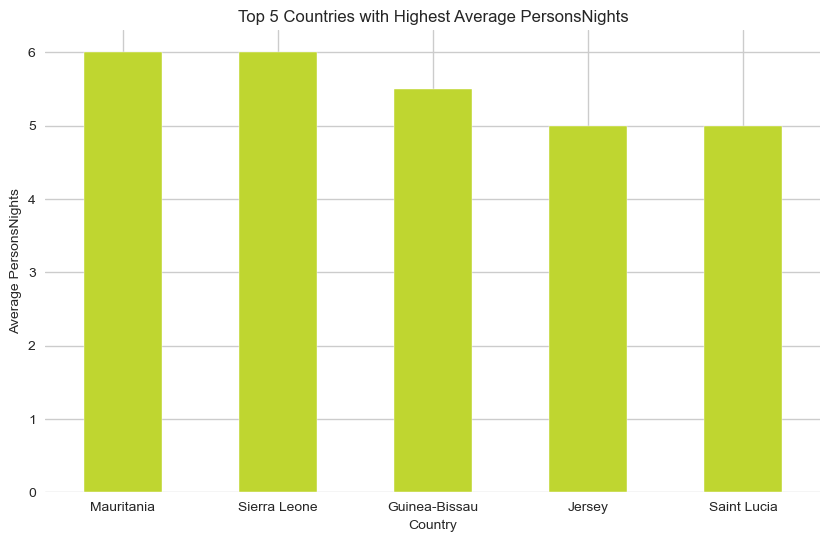

In [419]:
avg_room_nights_by_nationality = df.groupby('Nationality')['RoomNights'].mean()
top_5_countries_room_nights = avg_room_nights_by_nationality.nlargest(5)
top_5_countries_room_nights.index = top_5_countries_room_nights.index.map(get_country_name)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
top_5_countries_room_nights.plot(kind='bar', color='#bfd630')
plt.title('Top 5 Countries with Highest Average PersonsNights')
plt.xlabel('Country')
plt.ylabel('Average PersonsNights')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.show()

In [420]:
top_5_countries_room_nights = avg_room_nights_by_nationality.nlargest(5)
top_5_countries_rows = df[df['Nationality'].isin(top_5_countries_room_nights.index)]
top_5_countries_rows_count = top_5_countries_rows['Nationality'].value_counts()
top_5_countries_rows_count.index = top_5_countries_rows_count.index.map(get_country_name)
top_5_countries_rows_count

Nationality
Guinea-Bissau    12
Sierra Leone      2
Saint Lucia       1
Mauritania        1
Jersey            1
Name: count, dtype: int64

Both `PersonNights` and `RoomNights` should always be lower than the number of checkins. The group decided to check for any columns where did not happen.

In [421]:
df[(df['PersonsNights'] < df['BookingsCheckedIn']) | (df['RoomNights'] < df['BookingsCheckedIn'])]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup
ID,,,,,,,,,,,,,,,,,,,,,
1367,BRA,44,1340,0xAEABE7147D62F88846606E60A176F2A1AEB22E2838BC...,0xEE74E2C85705DE0543B8D4A911844321B263CA0ABD10...,10,594.0,366.50,0,0,...,0,0,0,1,0,0,0,0,0,41-50
2843,PRT,<NA>,1314,0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,8,0.0,5105.50,0,0,...,0,0,0,0,0,0,0,0,0,NaN
18377,PRT,<NA>,1067,0xEC7C48CD93845EECE913FD909C78AF8F8BA18AB08D0E...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3,0.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,NaN
18854,PRT,50,1058,0x9BB3606C1DA55448CC91A496CE56333767769A8FB473...,0xFB36F0A7DF90AB11E2AFEC7377CF9B5672EC2B184A63...,1,260.0,12.00,0,0,...,0,0,0,0,0,0,0,0,0,41-50
39157,FIN,51,729,0x9EEAA6DAE9241E36FF1A13DF7ED180939C37FC54E6BA...,0xE5123E18BD091C1108E145BE447859B469199AAAC5D7...,9,798.0,177.50,0,0,...,0,0,0,1,0,0,0,0,0,41-50
43674,NLD,33,641,0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...,0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...,41,267.0,109.00,0,0,...,0,0,0,0,1,0,0,0,0,31-40
48703,PRT,47,582,0x4968FDA6931962388A3F72423D1463557C11249C633A...,0xE19A74A3B67DE50FDCE82F5857A74A3805F5C8295DD1...,7,2687.0,3050.85,1,0,...,0,0,0,0,0,0,0,0,0,41-50
62974,PRT,46,466,0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...,0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...,3,269.0,7.00,0,1,...,0,0,0,1,0,0,0,0,0,41-50
75056,ESP,<NA>,377,0x14A77C11BA7C3B13207E72D4BA395580338D206DCA65...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,69,488.0,49.00,0,0,...,0,0,0,0,0,0,0,0,0,NaN


These were likely mistakes and were handled in the data cleaning section.

Another question is that `RoomNights` should always be lower (or equal) to person nights.

In [422]:
df[(df['PersonsNights'] < df['RoomNights'])]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup
ID,,,,,,,,,,,,,,,,,,,,,
2160,PRT,48,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,20,8493.65,2587.50,3,1,...,0,0,0,1,0,0,0,0,0,41-50
2757,PRT,<NA>,1315,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...,57,21781.00,1584.00,1,0,...,0,0,0,0,0,0,0,0,0,NaN
2843,PRT,<NA>,1314,0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,8,0.00,5105.50,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4196,PRT,45,1288,0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...,0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...,75,138.00,38.50,0,0,...,0,0,0,0,0,0,0,0,0,41-50
10151,PRT,66,1189,0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...,0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...,42,826.00,173.00,3,0,...,0,0,0,1,0,0,0,0,0,61-70
15416,PRT,49,1112,0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...,0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...,0,858.15,114.00,0,0,...,0,0,0,0,0,0,0,0,0,41-50
18978,USA,47,1057,0x82FDEEE5403B80470AABEC952A25DB7D37BEF253BD5C...,0xA0EA86D350113A03143831212044DE6CE61C2484CB18...,17,140.82,6.00,0,0,...,0,0,0,0,0,0,0,0,0,41-50
25309,ESP,52,929,0xDF5D8EAC38850FC98D7D5822110B10A44662D9D92279...,0xA508EDBFE269E231546629F11587FA2AAD4DE4851A31...,7,2114.00,376.60,1,0,...,0,0,0,0,0,0,0,0,0,51-60
26826,PRT,38,905,0x257B8DC0708BF75D2A3869648C15B36317B272A1D69B...,0xD37A405EAA2BF8D23CB44A9AE3C2A7BEC4C5A726BEE2...,18,297.00,172.90,0,0,...,0,0,0,1,1,0,0,0,0,31-40


The same procedure was used for these rows.

### `DistributionChannel`

In [423]:
df.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,'RoomNights']].mean().round()

,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights
DistributionChannel,,,,,,
Corporate,47.0,328.0,67.0,30.0,716.0,3.0
Direct,43.0,295.0,65.0,40.0,542.0,2.0
GDS Systems,44.0,289.0,36.0,21.0,536.0,2.0
Travel Agent/Operator,46.0,280.0,65.0,66.0,601.0,2.0


Regarding `Age`, all distribution channels have around 40 to 50 years of age. `LodgingRevenue` has it's peak in the Corporate channel, having a value that somewhat distances itself from the rest. For `OtherRevenue`, "GDS Systems" (Global Distribution System) is at half the value of all other channels. `AverageLeadTime` varies the most ranging from 21 (GDS Systems) to 66 (Travel Agent/Operator). The variable `DaysSinceCreation` has it's maximum in the "Corporate" channel. Finally `RoomNights` has only two values 2 and 3.

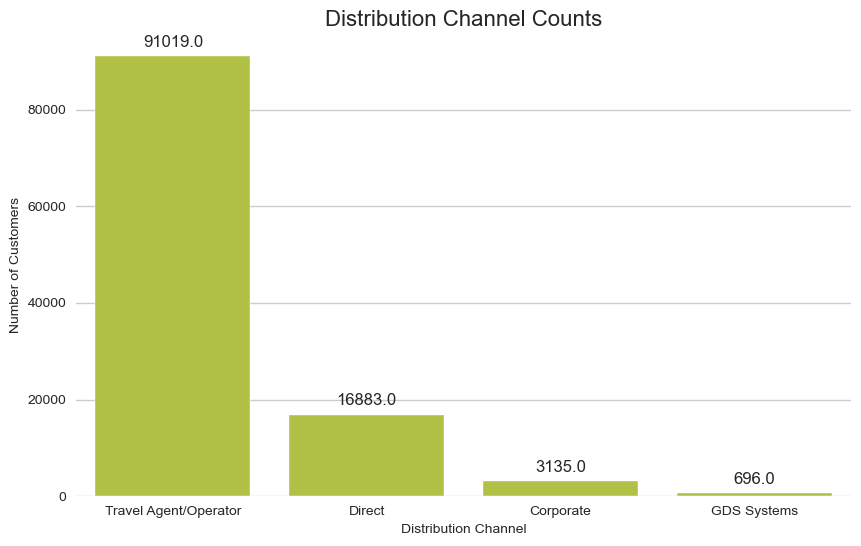

In [424]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.countplot(data=df, x='DistributionChannel', order=df['DistributionChannel'].value_counts().index, color='#bfd630')
plt.title('Distribution Channel Counts', size=16)
sns.despine(bottom=True, left=True)
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Customers')
# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Regarding the `DistributionChannels` it was apparent that most of the Bookings were made using "Travel Agents/Operators". The "category" that followed the closest was "Direct" altough there was a large gap between it and the first one. Both "Corporate" and "GDS Systems" represented a small percentage of bookings.

### `MarketSegment`

The aim of the project is to create a new type of market segmentationn for the hotel data, still the group decided that studying the existing market segmentation could be interesting.

In [425]:
market_segment_counts = df["MarketSegment"].value_counts()
market_segment_percentages = (df["MarketSegment"].value_counts(normalize=True) * 100).round(5)
market_segment_table = pd.DataFrame({
    'Count': market_segment_counts,
    'Percentage': market_segment_percentages
})
market_segment_table = market_segment_table.sort_values(by='Count', ascending=False)
market_segment_table

,Count,Percentage
MarketSegment,,
Other,63680,56.99301
Direct,16363,14.64473
Travel Agent/Operator,16353,14.63578
Groups,11461,10.25749
Corporate,2931,2.62322
Complementary,657,0.58801
Aviation,288,0.25776


The clients were separated into 7 market segments, the segment "Other" has the largest amount of clients (representing 56% of the customer base), followed by "Direct", "Travel Agent/Operator" and "Groups" (all of which represented between 10% and 15% of the customer base) and finally "Corporate", "Complementary" and "Aviation" represented the few remaining client. This market segmentation seems to be generic and unbalanced.

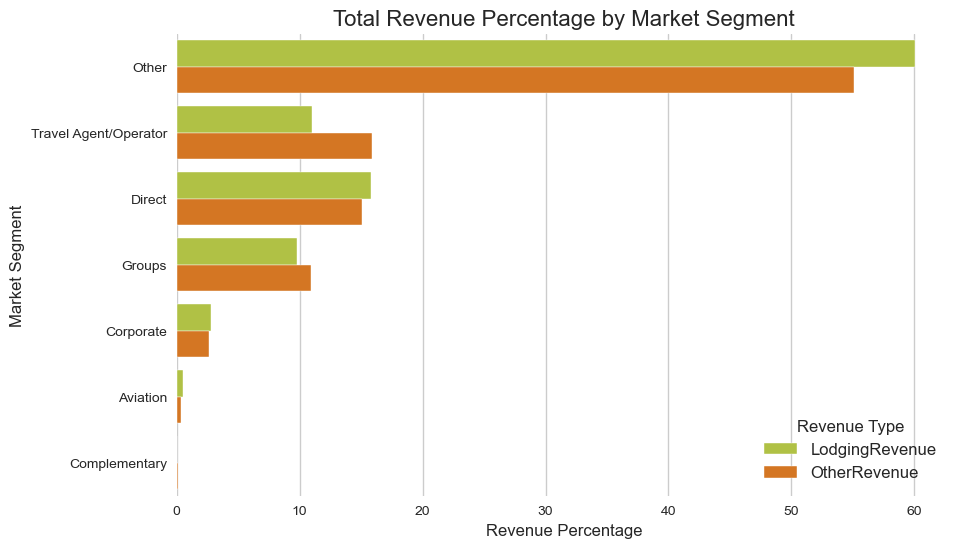

In [426]:
total_lodging_revenue = df['LodgingRevenue'].sum()
total_other_revenue = df['OtherRevenue'].sum()
revenue_by_market = df.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].sum().reset_index()
revenue_by_market['LodgingRevenue'] = (revenue_by_market['LodgingRevenue'] / total_lodging_revenue) * 100
revenue_by_market['OtherRevenue'] = (revenue_by_market['OtherRevenue'] / total_other_revenue) * 100
revenue_melted = revenue_by_market.melt(id_vars="MarketSegment", var_name="RevenueType", value_name="RevenuePercentage")
revenue_melted = revenue_melted.sort_values(by="RevenuePercentage", ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="RevenuePercentage", y="MarketSegment", hue="RevenueType", data=revenue_melted, palette=["#bfd630", "#f27405"])
plt.xlabel("Revenue Percentage", fontsize=12)
plt.ylabel("Market Segment", fontsize=12)
plt.legend(title="Revenue Type", loc='lower right', fontsize=12)
plt.title("Total Revenue Percentage by Market Segment", fontsize=16)
sns.despine(left=True, bottom=True)
plt.show()

Expectedly, "Other" represented the largest share of revenue for both lodging and other.

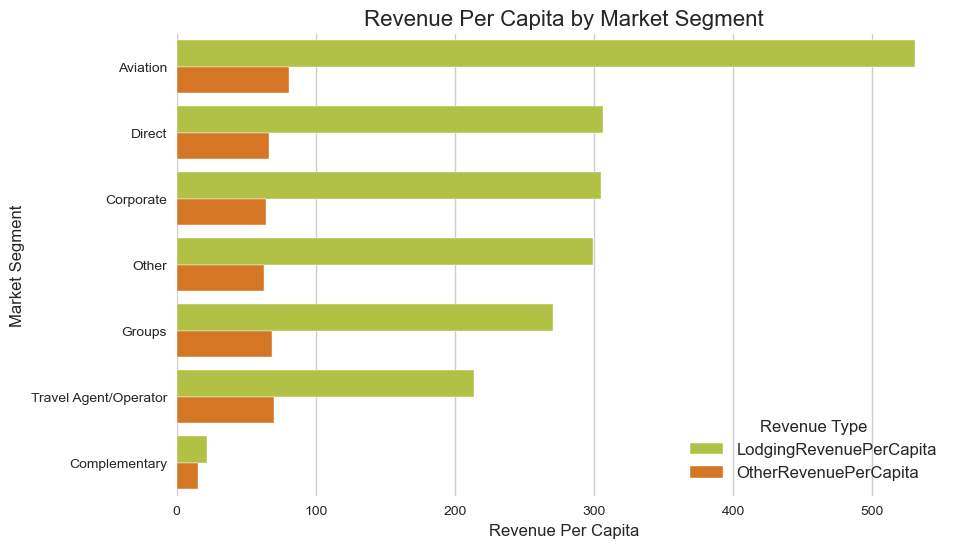

In [427]:
customers_per_market = df['MarketSegment'].value_counts().reset_index()
customers_per_market.columns = ['MarketSegment', 'CustomerCount']
revenue_by_market = df.groupby('MarketSegment')[['LodgingRevenue', 'OtherRevenue']].sum().reset_index()
revenue_by_market = revenue_by_market.merge(customers_per_market, on='MarketSegment')
revenue_by_market['LodgingRevenuePerCapita'] = revenue_by_market['LodgingRevenue'] / revenue_by_market['CustomerCount']
revenue_by_market['OtherRevenuePerCapita'] = revenue_by_market['OtherRevenue'] / revenue_by_market['CustomerCount']
revenue_by_market = revenue_by_market.sort_values(by='LodgingRevenuePerCapita', ascending=False)
revenue_melted = revenue_by_market.melt(id_vars="MarketSegment", value_vars=['LodgingRevenuePerCapita', 'OtherRevenuePerCapita'], 
                                        var_name="RevenueType", value_name="RevenuePerCapita")

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="RevenuePerCapita", y="MarketSegment", hue="RevenueType", data=revenue_melted, palette=["#bfd630", "#f27405"])
plt.xlabel("Revenue Per Capita", fontsize=12)
plt.ylabel("Market Segment", fontsize=12)
plt.legend(title="Revenue Type", loc='lower right', fontsize=12)
plt.title("Revenue Per Capita by Market Segment", fontsize=16)
sns.despine(left=True, bottom=True)
plt.show()

Looking at the data on a per capita basis the group obtained more interesting results. The "Aviation" segment had the the highest lodging and other revenue per capita. This suggest that altough this segment is composed of few clients, it represents an important income source for the hotel.

### Customer Nationality

In [428]:
len(df["Nationality"].unique())

199

There were 199 nationalities in the data, the group decide to add the actual country names along the ISO codes.

In [429]:
df['country_name'] = df['Nationality'].apply(get_country_name)
df['country_name'].unique()

array(['Portugal', 'Germany', 'France', 'Japan', 'Ireland', 'Spain',
       'Belgium', 'Netherlands', 'Austria', 'Italy', 'China',
       'Russian Federation', 'Poland', 'United States', 'Hungary',
       'Costa Rica', 'Mexico', 'Switzerland', 'Romania', 'United Kingdom',
       'Bosnia and Herzegovina', 'Brazil', 'Finland', 'Angola', 'Canada',
       'South Africa', 'Taiwan, Province of China', 'Greece', 'Australia',
       'Israel', 'Bulgaria', 'Saudi Arabia', 'Sweden', 'Argentina',
       'Armenia', 'Chile', 'Morocco', 'Mozambique', 'Korea, Republic of',
       'Tunisia', 'Denmark', 'Norway', 'Malaysia', 'Egypt', 'India',
       'Croatia', 'Cabo Verde', 'Jordan',
       'Congo, The Democratic Republic of the', 'Algeria', 'Luxembourg',
       'Türkiye', 'Iran, Islamic Republic of', 'Libya', 'Panama',
       'Colombia', 'Venezuela, Bolivarian Republic of', 'Guinea-Bissau',
       'Czechia', 'Andorra', 'Slovenia', 'Peru',
       'French Southern Territories', 'Uganda', 'Azerbaijan',
  

In [430]:
df[df['country_name'] == "Unknown code"]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup,country_name
ID,,,,,,,,,,,,,,,,,,,,,
9224,TMP,4,1205,0x56C32FBE43CE6E22529F453FDA238DC29B3D2DF27157...,0x52616FF3903E6D7E0F1430960F4686A67179480E1EFE...,41,325.8,107.0,0,0,...,0,0,1,0,0,0,0,0,NaN,Unknown code


One country was unkown, its code was TMP. After researching the group came to the conclusion that these code was actually reffering to Timor Leste. This code had to be changed to its newer version.

Reference:<br>
https://www.iso.org/obp/ui/#iso:code:3166:TP

In [431]:
df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
df['Nationality'].replace('TMP', 'TLS', inplace= True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\1159821334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\1159821334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

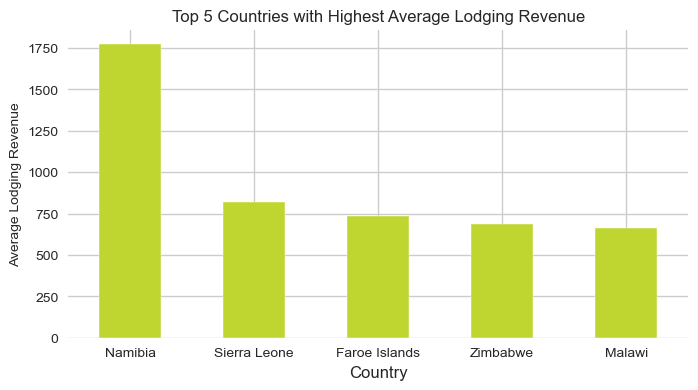

In [432]:
total_revenue_per_country = df.groupby('country_name')['LodgingRevenue'].mean()
top_5_countries = total_revenue_per_country.nlargest(5)

plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
top_5_countries.plot(kind='bar', color='#bfd630')
plt.title('Top 5 Countries with Highest Average Lodging Revenue')
plt.ylabel('Average Lodging Revenue')
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.show()


In [433]:
customers_per_country = df['country_name'].value_counts().reset_index()
customers_per_country.columns = ['country_name', 'CustomerCount']
customers_per_country = customers_per_country[customers_per_country['country_name'].isin(top_5_countries.index)]
customers_per_country = customers_per_country.sort_values(by='CustomerCount', ascending=False)
customers_per_country



,country_name,CustomerCount
113,Namibia,7
141,Malawi,3
165,Sierra Leone,2
187,Faroe Islands,1
189,Zimbabwe,1


Although the graph indicates that these countries have large lodging revenue, the number of clients with these nationalities suggests that these aren't large customer bases, but rather a few high-spending customers.

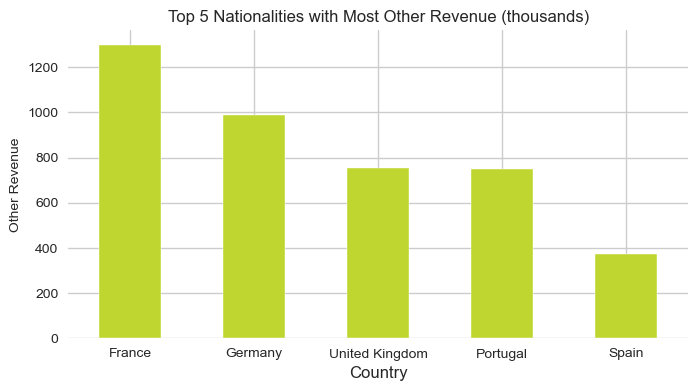

In [434]:
other_revenue_per_country = df.groupby('country_name')["OtherRevenue"].sum() / 1000
top_5_countries_other = other_revenue_per_country.nlargest(5).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
top_5_countries_other.plot(kind='bar', xlabel='Country', ylabel='Other Revenue', title='Top 5 Nationalities with Most Other Revenue (thousands)', color='#bfd630')
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.show()

In [435]:
customers_per_country_other = df['country_name'].value_counts().reset_index()
customers_per_country_other.columns = ['country_name', 'CustomerCount']
customers_per_country_other = customers_per_country_other[customers_per_country_other['country_name'].isin(top_5_countries_other.index)]
customers_per_country_other = customers_per_country_other.sort_values(by='CustomerCount', ascending=False)
customers_per_country_other

,country_name,CustomerCount
0,France,16516
1,Germany,14805
2,Portugal,14101
3,United Kingdom,11462
4,Spain,6123


Looking at the nationalities that had the most other revenue it was possible to conclude that this type of spending was dominated by european clients. Unlike the lodging these countries represent a large amount of clients hence the higher spending.

To get a wider view the group decided to bin the customers into continents.

In [436]:
continent_nationality = {
    'Africa': ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COD',
               'COG', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN',
               'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ',
               'NAM', 'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN',
               'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE', 'REU', 'MYT', 'SHN'],

    'Asia': ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'MMR', 'KHM', 'CHN', 'CYP', 'GEO',
             'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN',
             'MYS', 'MDV', 'MNG', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP',
             'KOR', 'LKA', 'SYR', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM',
             'HKG', 'MAC', 'TWN'],

    'Europe': ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST',
               'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LIE', 'LTU', 'LUX',
               'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR',
               'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT', 'FRO', 'GGY', 'JEY',
               'IMN', 'ALA', 'SJM'],

    'America': ['ATG', 'BHS', 'BRB', 'BLZ', 'CAN', 'CRI', 'CUB', 'DMA', 'DOM', 'SLV', 'GRD',
                'GTM', 'HTI', 'HND', 'JAM', 'MEX', 'NIC', 'PAN', 'KNA', 'LCA', 'VCT', 'TTO',
                'USA', 'ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR',
                'URY', 'VEN', 'AIA', 'BMU', 'CYM', 'GLP', 'MTQ', 'PRI', 'VIR', 'SPM', 'BES', 'CUW', 'ABW'],

    'Oceania': ['AUS', 'FJI', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV', 'VUT',
                'ASM', 'PYF', 'NCL', 'WLF'],

    'Antarctica': ['ATA', 'HMD', 'BVT', 'SGS', 'TF', 'PCN']
}

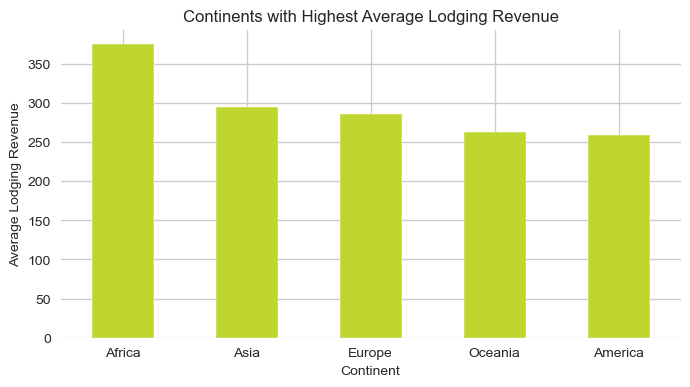

In [437]:
# Create a column with the continent of each country
df['continent'] = df['Nationality'].apply(lambda x: next((k for k, v in continent_nationality.items() if x in v), 'Unknown'))

# Calculate total lodging revenue per continent
total_revenue_per_continent = df.groupby('continent')['LodgingRevenue'].mean()

# Sort by revenue and select top 5 countries
top_5_continents = total_revenue_per_continent.nlargest(5)

# Plotting
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
top_5_continents.plot(kind='bar', color='#bfd630')
plt.title('Continents with Highest Average Lodging Revenue')
plt.xlabel('Continent')
plt.ylabel('Average Lodging Revenue')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.show()

### Lodging and Other Revenue

The group analysed the different types of revenues and their relationships with bookings. There were four scenarios:
- No revenue generated: Customers who didn´t contribute to any revenue. (`LodgingRevenue` = 0 and `OtherRevenue` = 0)
- Revenue from lodging only: Customers who spent on lodging but not on any other hotel services. (`LodgingRevenue` > 0 and `OtherRevenue` = 0)
- Revenue from services only: Customers who didn´t spent on lodging, but spent on services in the hotel (`LodgingRevenue` = 0 and `OtherRevenue` > 0)
- Revenue from Lodging and Other Services: Customers who contributed to both lodging and other hotel services. (`LodgingRevenue` > 0 and `OtherRevenue` > 0)

#### No Revenue generated

In [438]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] == 0)].shape[0]

33537

The group decide to check whether there were situations where the total revenue was 0, but at least one booking had been checked in with no cancellations or no-shows.

In [439]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] == 0) & (df["BookingsCanceled"] == 0) & (df["BookingsNoShowed"] == 0) & (df["BookingsCheckedIn"] > 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup,country_name,continent
ID,,,,,,,,,,,,,,,,,,,,,
39,PRT,<NA>,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,NaN,Portugal,Europe
40,PRT,<NA>,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,NaN,Portugal,Europe
632,PRT,<NA>,1362,0x382AE8A7FF864DC64B3B66727EBD610D68068BD5CA1A...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,2,0.0,0.0,0,0,...,0,0,0,0,0,0,0,NaN,Portugal,Europe
681,PRT,<NA>,1360,0x7FF6B1BA3C76DDE2371DDB19F0AF3251438B6DE0349C...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3,0.0,0.0,0,0,...,0,0,0,0,0,0,0,NaN,Portugal,Europe
755,PRT,55,1358,0xEB59F8A70C9111C0BFB9988BB153699E509CDBE46B65...,0x5EE9DD215265D79B45B025B5BA4C49C575CDCA0021CA...,2,0.0,0.0,0,0,...,0,0,0,0,0,0,0,51-60,Portugal,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106121,PRT,39,81,0x33528842AC6715327408D88ABC085392C20C06AB7E14...,0x2C75B1971369B3BACB93E2AB7F7BAB5FEA89CFB21B47...,3,0.0,0.0,0,0,...,0,0,1,0,0,0,0,31-40,Portugal,Europe
106398,PRT,56,79,0xBAE14E9ADB904ADBB358EF47D35AA1BD545C5C4DC08D...,0xB46B1C260C7D776327573FBBDE64CB94CCABAE2BEDB2...,263,0.0,0.0,0,0,...,0,0,0,0,0,0,0,51-60,Portugal,Europe
109312,PRT,48,55,0x6303926D8892037E60B7A372DFE7D2FAD544420B566C...,0x8FEA25577B5C3BD878128DFDF0EE140B7CEBE5F2BFCC...,8,0.0,0.0,0,0,...,0,1,0,0,0,0,0,41-50,Portugal,Europe


In [440]:
market_segment_counts = df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] == 0) & (df["BookingsCanceled"] == 0) & (df["BookingsNoShowed"] == 0) & (df["BookingsCheckedIn"] > 0)]['MarketSegment'].value_counts()
market_segment_percentages = (market_segment_counts / market_segment_counts.sum() * 100).round(2)

market_segment_table = pd.DataFrame({
    'Number of Customers': market_segment_counts,
    'Percentage': market_segment_percentages
})

market_segment_table

,Number of Customers,Percentage
MarketSegment,,
Complementary,279,84.80
Groups,26,7.90
Travel Agent/Operator,13,3.95
Direct,10,3.04
Corporate,1,0.30


This would indicate that these 327 customers essentially did not make any payment, yet still made use of hotel services in some form. 84% of these customers belong to the Complementary Market Segment.

#### Revenue from services only

There were 232 customers who didn´t spent on lodging, but spent in services in the hotel.

In [441]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] > 0)].shape[0]

232

In [442]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] > 0)]['BookingsCanceled'].value_counts()

BookingsCanceled
0    227
1      5
Name: count, dtype: int64

In [443]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] > 0) & (df['BookingsCanceled'] > 0) & (df['BookingsCheckedIn'] > 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup,country_name,continent
ID,,,,,,,,,,,,,,,,,,,,,
4354,PRT,<NA>,1285,0x15D0EB4E4C364D793D1D9205D757A88E7BFB3A101849...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,7,0.0,6.0,1,0,...,0,0,0,0,0,0,0,NaN,Portugal,Europe
14720,PRT,<NA>,1122,0x9465E0AA2ED44F37DA0EDAACB4882A59A3DE66DFC000...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,4,0.0,5.0,1,0,...,0,1,1,0,0,0,0,NaN,Portugal,Europe
41836,PRT,69,686,0xA8151127487D6D3DCFDB134752A166223267C9C9B231...,0x528C1055DA2E2D1DEB8C84D846B517AE72CE74830F33...,20,0.0,26.0,1,0,...,0,1,0,0,0,0,0,61-70,Portugal,Europe
43207,PRT,<NA>,651,0x0701CFD5F16F2D68DE51ABEC21C049C7431442F24207...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,0.0,6.0,1,0,...,0,1,0,0,0,0,0,NaN,Portugal,Europe
71788,PRT,48,401,0x6303926D8892037E60B7A372DFE7D2FAD544420B566C...,0x8FEA25577B5C3BD878128DFDF0EE140B7CEBE5F2BFCC...,16,0.0,26.0,1,0,...,0,1,1,0,0,0,0,41-50,Portugal,Europe


In [444]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] > 0)]['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    232
Name: count, dtype: int64

In [445]:
df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] > 0)]['MarketSegment'].value_counts()

MarketSegment
Complementary            147
Groups                    37
Travel Agent/Operator     19
Direct                    18
Corporate                  6
Other                      5
Name: count, dtype: int64

In this situation, there were no inconsistencies, and the majority of the customers were from the Complementary Market Segment.

#### Revenue from lodging only

Only 15 customers spent on lodging but not in any other hotel services.

In [446]:
df[(df['LodgingRevenue'] != 0) & (df['OtherRevenue'] == 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup,country_name,continent
ID,,,,,,,,,,,,,,,,,,,,,
1013,FRA,64,1347,0xFD2BA94A5097F72D5AA0B30BF4F4583E7C93F6F2F339...,0x91A8597A774E7D7D6B714AD3429FBE4D0A676313E515...,0,237.0,0.0,0,0,...,0,0,0,0,0,0,0,61-70,France,Europe
1530,ESP,32,1336,0x42235000D0D811D2EA2F92DA14659D6999008EE2E707...,0xFC0AC0A9F074EC881C023C949B40B3358672069E4E1D...,0,79.0,0.0,0,0,...,0,0,0,0,0,0,0,31-40,Spain,Europe
2102,PRT,29,1323,0x9326B4F094BAC1C2335D57C74CF3216354CB2E221F5D...,0x1806379BFC8E84188FC253AEE5C029AB28D35BF3D77A...,0,712.0,0.0,0,0,...,0,0,0,0,0,0,0,18-30,Portugal,Europe
21043,PRT,31,1009,0x7AA2E5D1E992D1BE101665BEC43F9CBB6BC95B966DE5...,0xC46819F7BF45AC988F86FC1B0F2C9ECD6EEA4E00BC60...,6,40.0,0.0,0,0,...,0,0,0,0,0,0,0,18-30,Portugal,Europe
56728,PRT,43,514,0xD4F214185B9A2F34FF1D43A8CC65F1B9DF8BF4D289D1...,0xBFDB1C0A4048835D026686C10AC92CC91CD354B29B0A...,87,154.0,0.0,0,0,...,0,0,0,0,0,0,0,41-50,Portugal,Europe
63322,AUS,14,463,0x1FBC89DDC4F5B81F6DCEA44A1D98F1EA49DE8637A140...,0x7D86380284AD07F008E94881C9198802AE9D89549B28...,98,486.0,0.0,0,0,...,0,0,0,0,0,0,0,NaN,Australia,Oceania
65883,SWE,7,444,0xF738F112373AC9D5B4FD58ABFB63629CEF50552C9632...,0x03A0D1FBCE42564D2E625B60971C1B2C0F615CE2776B...,12,513.0,0.0,0,0,...,0,0,0,0,0,0,0,NaN,Sweden,Europe
80035,PRT,<NA>,336,0x7C2CCEE7ADCF83E07306A8ADA983F829BFBD3EC0D713...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,9,109.0,0.0,0,0,...,0,1,0,0,0,0,0,NaN,Portugal,Europe
82054,PRT,36,311,0xE1DC53786D5801ABC6A5478F564B04A8986EEA7973FD...,0xB43EAE3242E89E810504F09A4961E18F37EF124EF608...,149,44.0,0.0,0,0,...,0,1,0,0,0,0,0,31-40,Portugal,Europe


In [447]:
df[(df['LodgingRevenue'] != 0) & (df['OtherRevenue'] == 0)]["BookingsCanceled"].value_counts()

BookingsCanceled
0    15
Name: count, dtype: int64

In [448]:
df[(df['LodgingRevenue'] != 0) & (df['OtherRevenue'] == 0)]["BookingsNoShowed"].value_counts()

BookingsNoShowed
0    15
Name: count, dtype: int64

In [449]:
df[(df['LodgingRevenue'] != 0) & (df['OtherRevenue'] == 0)]["BookingsCheckedIn"].value_counts()

BookingsCheckedIn
1    15
Name: count, dtype: int64

All 15 customers had only one booking, and they all ended up staying.

#### Revenue from lodging and other services

Finally, there were 77,949 customers who contributed to both lodging and other hotel services.

In [450]:
df[(df['LodgingRevenue'] > 0) & (df['OtherRevenue'] > 0)].shape[0]

77949

In [451]:
df[(df['LodgingRevenue'] > 0) & (df['OtherRevenue'] > 0)]["BookingsCanceled"].value_counts()

BookingsCanceled
0     77800
1       112
2        16
3        10
4         8
15        1
7         1
5         1
Name: count, dtype: int64

In [452]:
df[(df['LodgingRevenue'] > 0) & (df['OtherRevenue'] > 0) & (df['BookingsCheckedIn'] == 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,AgeGroup,country_name,continent
ID,,,,,,,,,,,,,,,,,,,,,
70580,PRT,<NA>,410,0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...,NaN,114,249.3,18.0,0,0,...,0,0,0,0,0,0,0,NaN,Portugal,Europe


There was one customer with no bookings—neither canceled, no-showed, nor checked in—but with revenue, which is unusual.

### `LeadTimeInterval`

In [453]:
average_lead_time_description = df["AverageLeadTime"].describe().reset_index()
average_lead_time_description.columns = ['Statistic', 'Value']
average_lead_time_description

,Statistic,Value
0,count,111733.000000
1,mean,60.833147
2,std,85.115320
3,min,-1.000000
4,25%,0.000000
5,50%,21.000000
6,75%,95.000000
7,max,588.000000


The group first aproached this by checking the distribution of bookings that were cancelled and and not showed throughout every lead time interval.

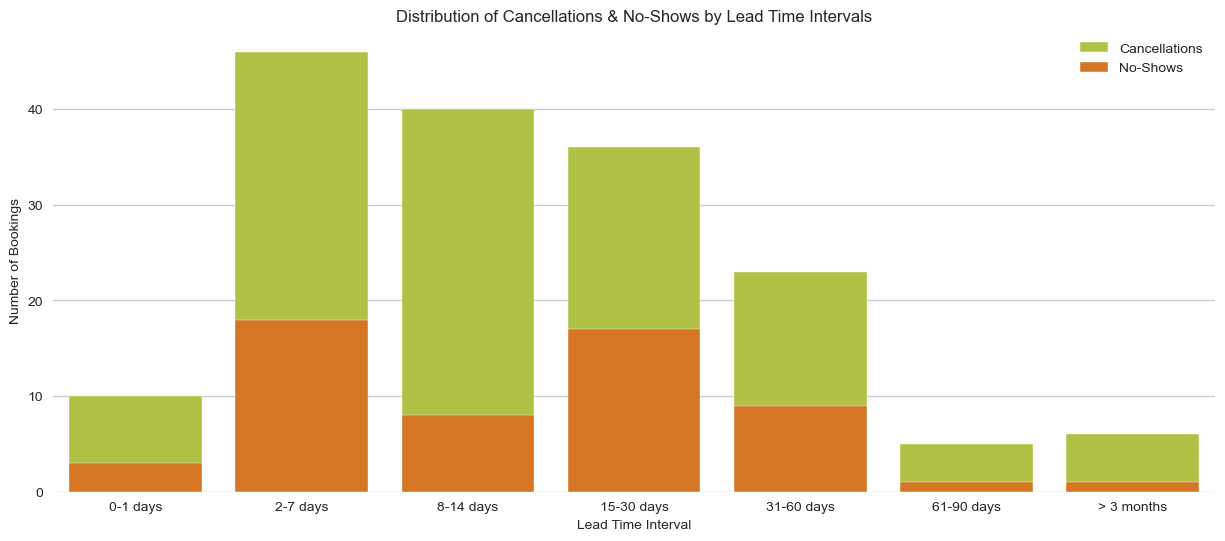

In [454]:
bins = [0, 1, 7, 14, 30, 60, 90, 588]
labels = ['0-1 days', '2-7 days', '8-14 days', '15-30 days', '31-60 days', '61-90 days', '> 3 months']


df['LeadTimeInterval'] = pd.cut(df['AverageLeadTime'], bins=bins, labels=labels, right=False)
cancellation_distribution = df[df['BookingsCanceled'] > 0]['LeadTimeInterval'].value_counts().sort_index()
no_show_distribution = df[df['BookingsNoShowed'] > 0]['LeadTimeInterval'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=cancellation_distribution.index, y=cancellation_distribution.values, color='#bfd630', label='Cancellations')
sns.barplot(x=no_show_distribution.index, y=no_show_distribution.values, color='#f27405', label='No-Shows')
plt.xlabel('Lead Time Interval')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Cancellations & No-Shows by Lead Time Intervals')
plt.legend()
sns.despine(left=True, bottom=True)
plt.show()

This didn’t make much sense because a single customer with an average lead time of one day could have ten canceled bookings, so we had to account for that. We decided to check the distribution of customers throughout the interval.

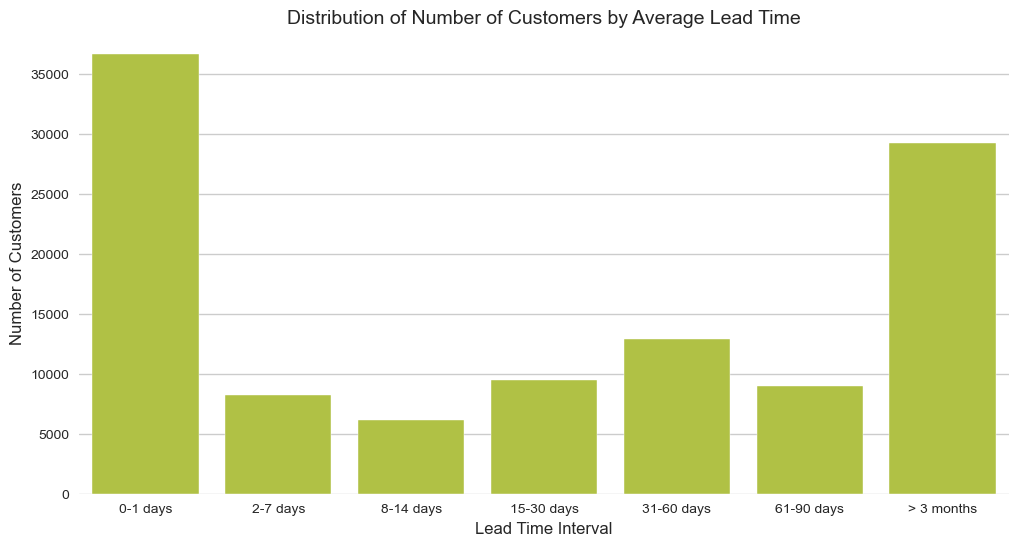

In [455]:
customers_lead_time = df['LeadTimeInterval'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=customers_lead_time.index, y=customers_lead_time.values, color='#bfd630')
plt.xlabel('Lead Time Interval', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Distribution of Number of Customers by Average Lead Time', fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()

To overall the cancellation/no-show rate for all bookings in each lead time interval the group decided to group the customers by LeadTimeInterval, sum the bookings and calculate the overall interval percentage .

In [456]:
df['Total_Bookings'] = df['BookingsCanceled'] + df['BookingsNoShowed'] + df['BookingsCheckedIn']

# group by LeadTimeInterval
lead_time_grouped = df.groupby('LeadTimeInterval').agg({
    'BookingsCanceled': 'sum',
    'BookingsNoShowed': 'sum',
    'BookingsCheckedIn': 'sum',
    'Total_Bookings': 'sum'
}).reset_index()

# percentages of each time interval for cancelled and no showed bookings
lead_time_grouped['Cancel_Percentage'] = (lead_time_grouped['BookingsCanceled'] / lead_time_grouped['Total_Bookings']) * 100
lead_time_grouped['NoShow_Percentage'] = (lead_time_grouped['BookingsNoShowed'] / lead_time_grouped['Total_Bookings']) * 100
lead_time_grouped['CheckIn_Percentage'] = (lead_time_grouped['BookingsCheckedIn'] / lead_time_grouped['Total_Bookings']) * 100

lead_time_grouped[['LeadTimeInterval', 'Cancel_Percentage', 'NoShow_Percentage', 'CheckIn_Percentage']]

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\3809279232.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_grouped = df.groupby('LeadTimeInterval').agg({


,LeadTimeInterval,Cancel_Percentage,NoShow_Percentage,CheckIn_Percentage
0,0-1 days,0.354031,0.081699,99.564270
1,2-7 days,0.711253,0.222930,99.065817
2,8-14 days,0.764706,0.117647,99.117647
3,15-30 days,0.579934,0.202977,99.217089
4,31-60 days,0.332816,0.088751,99.578434
5,61-90 days,0.076494,0.010928,99.912578
6,> 3 months,0.036919,0.003356,99.959725


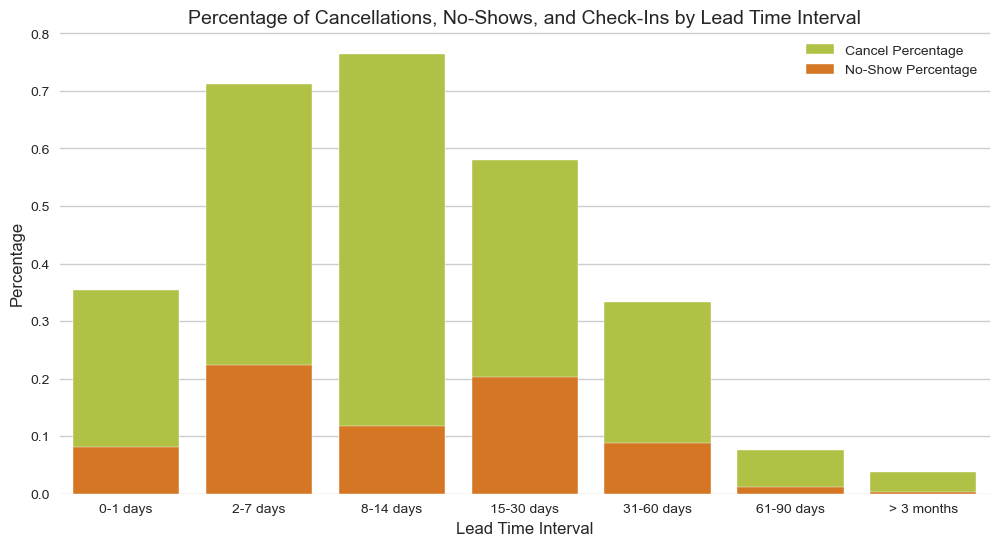

In [457]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x='LeadTimeInterval', y='Cancel_Percentage', data=lead_time_grouped, color='#bfd630', label='Cancel Percentage')
sns.barplot(x='LeadTimeInterval', y='NoShow_Percentage', data=lead_time_grouped, color='#f27405', label='No-Show Percentage')

plt.xlabel('Lead Time Interval', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Cancellations, No-Shows, and Check-Ins by Lead Time Interval', fontsize=14)
plt.legend()
sns.despine(left=True, bottom=True)
plt.show()


Given that the proportions of cancellations and no-shows were relatively low (<1%), then their overall impact might not be as significant.

Next, the group decided to observe if the revenue was related with the average lead time. In this case, the group only accounted for the customers who had at least one booking checkd in or one booking cancelled (revenue from the cancelation fee), in other words, we only included customers who actually generated revenue by staying in the hotel or cancelling the booking.

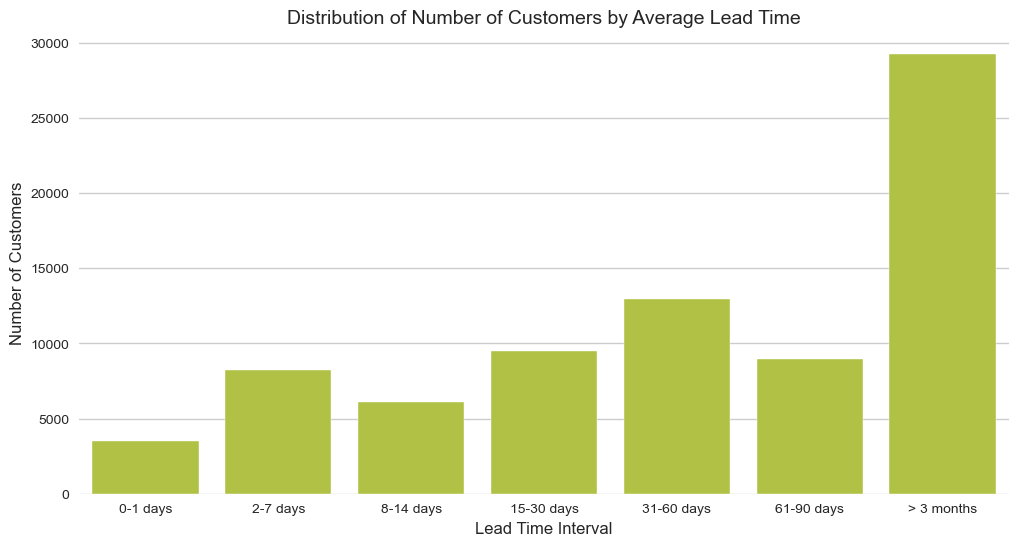

In [458]:
# Filter customers who had at least one checked-in booking or at least one booking canceled
df_checked_in_or_canceled = df[(df['BookingsCheckedIn'] > 0) | (df['BookingsCanceled'] > 0)]
customers_lead_time = df_checked_in_or_canceled['LeadTimeInterval'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=customers_lead_time.index, y=customers_lead_time.values, color='#bfd630')
plt.xlabel('Lead Time Interval', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Distribution of Number of Customers by Average Lead Time', fontsize=14)
sns.despine(left=True, bottom=True)
plt.show()

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\2312848718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checked_in_or_canceled['LeadTimeInterval'] = pd.cut(df_checked_in_or_canceled['AverageLeadTime'], bins=bins, labels=labels, right=False)
C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\2312848718.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue_lead_time = df_checked_in_or_canceled.groupby('LeadTimeInterval')[['LodgingRevenue', 'OtherRevenue']].mean().reset_index()


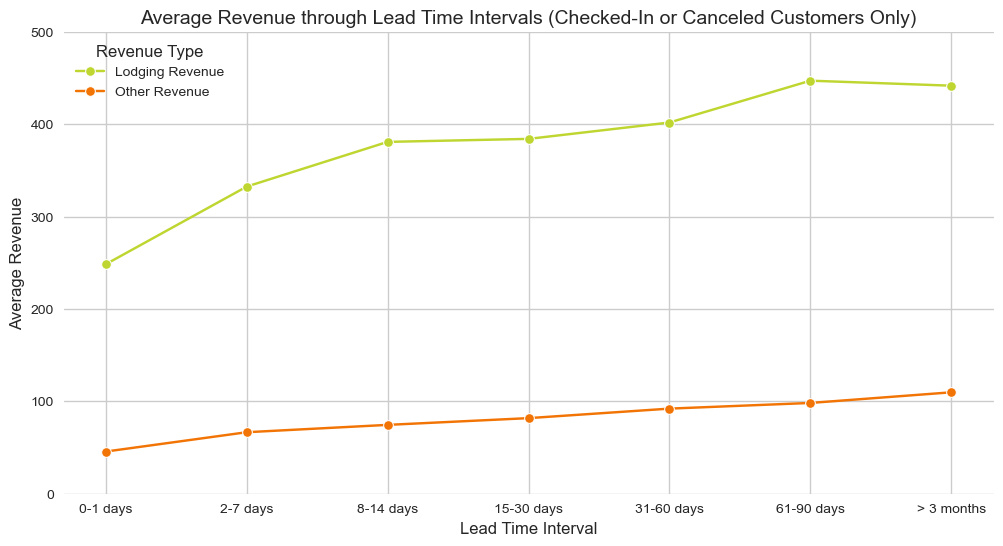

In [459]:
# intervals for AverageLeadTime
df_checked_in_or_canceled['LeadTimeInterval'] = pd.cut(df_checked_in_or_canceled['AverageLeadTime'], bins=bins, labels=labels, right=False)

# average revenue through the lead time intervals
avg_revenue_lead_time = df_checked_in_or_canceled.groupby('LeadTimeInterval')[['LodgingRevenue', 'OtherRevenue']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=avg_revenue_lead_time, x='LeadTimeInterval', y='LodgingRevenue', label='Lodging Revenue', marker='o', color='#bfd630')
sns.lineplot(data=avg_revenue_lead_time, x='LeadTimeInterval', y='OtherRevenue', label='Other Revenue', marker='o', color='#f27405')

plt.xlabel('Lead Time Interval', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.title('Average Revenue through Lead Time Intervals (Checked-In or Canceled Customers Only)', fontsize=14)
plt.legend(title='Revenue Type')
plt.ylim(0,500)
sns.despine(left=True, bottom=True)
plt.show()

From the plot above the group concluded that the Average Lodging revenue increases significantly as the Average Lead Time increases whereas Other Revenue increasead more gradually. This trend suggests that customers with shorter lead times (0-1 days) generate lower average revenue, while those with longer lead times spent more on average. One possible justification was customers bookings at the last minute may be staying only one night keeping their overall spend low and those booking far in advance might be planning a long vacation, increasing their revenue contribution.

### Binary Feature Visualisations

In [460]:
# Select columns starting with 'SR'
sr_columns = [col for col in df_checked_in_or_canceled.columns if col.startswith('SR')]

# Melt the DataFrame to have all 'SR' columns in a single column
df_melted = df_checked_in_or_canceled.melt(value_vars=sr_columns, var_name='SR', value_name='value')

# Group by the 'value' column (0 or 1) and count the occurrences
grouped_counts = df_melted.groupby(['SR', 'value']).size().unstack(fill_value=0)

# Calculate the percentage columns
grouped_counts['Percentage_0'] = (grouped_counts[0] / (grouped_counts[0] + grouped_counts[1]) * 100).round(2)
grouped_counts['Percentage_1'] = (grouped_counts[1] / (grouped_counts[0] + grouped_counts[1]) * 100).round(2)
grouped_counts = grouped_counts[[0, 'Percentage_0', 1, 'Percentage_1']]
grouped_counts.columns = ['0 Count', '0 Percentage', '1 Count', '1 Percentage']
grouped_counts


,0 Count,0 Percentage,1 Count,1 Percentage
SR,,,,
SRAccessibleRoom,78515,99.97,21,0.03
SRAwayFromElevator,78243,99.63,293,0.37
SRBathtub,78312,99.71,224,0.29
SRCrib,77709,98.95,827,1.05
SRHighFloor,75302,95.88,3234,4.12
SRKingSizeBed,50676,64.53,27860,35.47
SRLowFloor,78439,99.88,97,0.12
SRMediumFloor,78473,99.92,63,0.08
SRNearElevator,78508,99.96,28,0.04


The "sr variables" seem to be mostly composed of customers who have no preferences except for the customers who prefer king size beds. The group decided to "simplify" this variable by creating a new column named `has_preference` where customers who have preferences have a 1 while customers ewithout preferences have a 0.

In [461]:
df['has_preference'] = df[sr_columns].apply(lambda x: 'Yes' if x.any() else 'No', axis=1)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\2556875887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preference_counts.index, y=preference_counts.values, palette=['#bfd630', 'grey'])


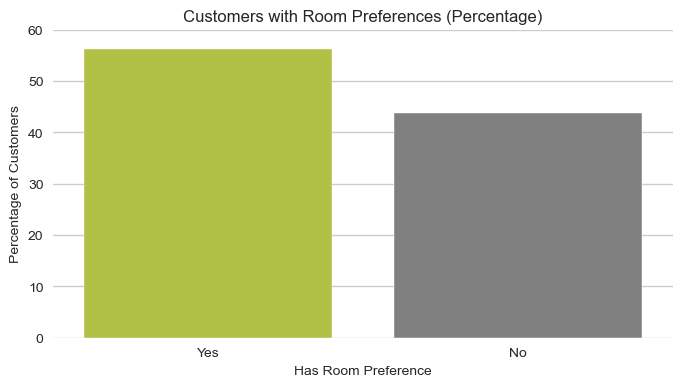

In [462]:
preference_counts = df['has_preference'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.barplot(x=preference_counts.index, y=preference_counts.values, palette=['#bfd630', 'grey'])
plt.title('Customers with Room Preferences (Percentage)')
plt.ylabel('Percentage of Customers')
plt.xlabel('Has Room Preference')
plt.ylim(0,60)
sns.despine(left=True, bottom=True)
plt.show()

Most customers (approximatly 55%) have some type of room preference.

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 4. Data Cleaning
    

</div>

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Nationality           111733 non-null  object  
 1   Age                   107561 non-null  Int64   
 2   DaysSinceCreation     111733 non-null  int64   
 3   NameHash              111733 non-null  object  
 4   DocIDHash             110732 non-null  object  
 5   AverageLeadTime       111733 non-null  int64   
 6   LodgingRevenue        111733 non-null  float64 
 7   OtherRevenue          111733 non-null  float64 
 8   BookingsCanceled      111733 non-null  int64   
 9   BookingsNoShowed      111733 non-null  int64   
 10  BookingsCheckedIn     111733 non-null  int64   
 11  PersonsNights         111733 non-null  int64   
 12  RoomNights            111733 non-null  int64   
 13  DistributionChannel   111733 non-null  object  
 14  MarketSegment         111733 non-null  ob

Before the data cleaning phase, the group removed all new features created during EDA, so they could be created after the cleaning.

In [464]:
df.drop(["AgeGroup", "country_name", 'continent', 'LeadTimeInterval', 'Total_Bookings', 'has_preference'], axis=1, inplace=True)

## Inconsistencies

#### Person Nights and Room Nights

In [465]:
# Check how many records have PersonNights < RoomNights
df[df['PersonsNights'] < df['RoomNights']].shape[0]

28

The group examined whether there were any instances where RoomNights exceeded PersonNights and concluded that there were 28 such cases. Since this is illogical, as it is not possible to have more RoomNights than PersonNights, we proceeded to delete those rows.

In [466]:
# Eliminate rows where 'PersonsNights' is less than 'RoomNights'
df = df[df['PersonsNights'] >= df['RoomNights']]
print (df.shape)

(111705, 28)


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111705 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111705 non-null  object 
 1   Age                   107539 non-null  Int64  
 2   DaysSinceCreation     111705 non-null  int64  
 3   NameHash              111705 non-null  object 
 4   DocIDHash             110704 non-null  object 
 5   AverageLeadTime       111705 non-null  int64  
 6   LodgingRevenue        111705 non-null  float64
 7   OtherRevenue          111705 non-null  float64
 8   BookingsCanceled      111705 non-null  int64  
 9   BookingsNoShowed      111705 non-null  int64  
 10  BookingsCheckedIn     111705 non-null  int64  
 11  PersonsNights         111705 non-null  int64  
 12  RoomNights            111705 non-null  int64  
 13  DistributionChannel   111705 non-null  object 
 14  MarketSegment         111705 non-null  object 
 15  SRHig

### Age inconsistencies

First the group dealt with the clients who were underage but had spending attributed to them. These rows were fixed using the mode value of the age of each customers nationality.

Remove negative ages

In [468]:
df = df[df['Age'].isna() | (df['Age'] > 0)]

In [469]:
# Count the number of people with age under 18
num_under_18 = df[df['Age'] < 18].shape[0]
under_18 = df[df['Age'] < 18]

print('Number of people with age under 18:', num_under_18)

Number of people with age under 18: 6861


In [470]:
under_18.loc[(under_18['LodgingRevenue'] != 0) | (under_18['OtherRevenue'] != 0)].shape[0]

1022

The group observed that the number of customers underage was 6861, however, only 1022 had generated revenue, this means that they are likely adults and the age is an error. For these cases, ages were replaced using the conditional mode (most common age of customers Nationality). The remaining underage customers were removed, because they had not generated any revenue and they were likely children. The group decided not to target underage people.

In [471]:
# Compute the mode age for each nationality (ignoring ages below 18)
valid_ages = df[df["Age"] >= 18]  
mode_age_by_nationality = valid_ages.groupby("Nationality")["Age"].agg(pd.Series.mode)

# Convert mode series to a dictionary (handle multiple modes by taking the first one)
mode_age_by_nationality = mode_age_by_nationality.apply(lambda x: x[0] if isinstance(x, (list, tuple, pd.Series)) else x).to_dict()

# Compute the median age of the dataset
median_age = df["Age"].median()

# Function to replace ages under 18 that generated revenue (excluding missing values)
def impute_age(row):
    if pd.notna(row["Age"]) and row["Age"] < 18 and (row["LodgingRevenue"] > 0 or row["OtherRevenue"] > 0):
        nationality = row["Nationality"]
        mode_age = mode_age_by_nationality.get(nationality, None)  # Use None instead of median initially
        
        # If the mode age is invalid (under 18) or there's only one customer, use the median
        if mode_age is None or mode_age < 18 or df[df["Nationality"] == nationality].shape[0] == 1:
            return median_age
        return mode_age
    
    return row["Age"]

# Apply the function without modifying missing values
df.loc[df["Age"].notna(), "Age"] = df[df["Age"].notna()].apply(impute_age, axis=1)

In [472]:
num_under_18 = df[df['Age'] < 18].shape[0]
under_18 = df[df['Age'] < 18]
under_18.loc[(under_18['LodgingRevenue'] != 0) | (under_18['OtherRevenue'] != 0)].shape[0]

0

In [473]:
# Remove rows where 'Age' is below 18, but keep rows with missing 'Age' values
df = df[(df['Age'] >= 18) | df['Age'].isnull()]

### Room preferences Inconsistencies


In [474]:
df[(df['SRBathtub'] == 1) & (df['SRShower'] == 1)].shape[0]


0

In [475]:
df[(df['SRNearElevator'] == 1) & (df['SRAwayFromElevator'] == 1)].shape[0]

0

In [476]:

df[(df['SRHighFloor'] == 1) & (df['SRLowFloor'] == 1) & (df['SRMediumFloor'] == 1)].shape[0]

0

The group didn’t observe any contradictory special requests.

### Revenue and Booking

Customers that generated no revenue to the hotel

In [477]:
# this variable stores the customers that have no revenue at all

customers_no_revenue = df[(df['LodgingRevenue'] == 0) & (df['OtherRevenue'] == 0)]
customers_no_revenue.shape

(27681, 28)

Customers that didn´t engage with bookings but are present in the data set - Loyalty Program


In [478]:
#This variable stores the customers that didn´t engage with bookings but are in the data set

no_engagement_customers = df[(df['BookingsCanceled'] == 0) & (df['BookingsNoShowed'] == 0) & (df['BookingsCheckedIn'] == 0)]
no_engagement_customers.shape

(27349, 28)

Customers that didn´t engaged with booking and have no revenue - No Value Customers

In [479]:
# Combine the five conditions
combined_conditions = df[
    (df['LodgingRevenue'] == 0) &
    (df['OtherRevenue'] == 0) &
    (df['BookingsCanceled'] == 0) &
    (df['BookingsNoShowed'] == 0) &
    (df['BookingsCheckedIn'] == 0)
]

# Get the shape of the DataFrame that meets all the conditions
combined_conditions_shape = combined_conditions.shape

# Display the number of rows that meet all the conditions
print("Number of rows that meet all the conditions:", combined_conditions_shape[0])

Number of rows that meet all the conditions: 27348


This means the data set cointains 27 348 customers that currently do not impact the business in any form.

There is only one customer who has engaged with the hotel in terms of revenue but not with bookings. We consider this a data entry error and will delete it.

In [480]:
# Filter no_engagement_customers where average lead time is greater than 1
filtered_no_engagement_customers = no_engagement_customers[no_engagement_customers['LodgingRevenue'] > 1]

# Display the filtered DataFrame
filtered_no_engagement_customers

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
70580,PRT,<NA>,410,0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...,NaN,114,249.3,18.0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is illogical for a customer to have no bookings while still having LodgingRevenue. We consider this a data entry error and will remove the corresponding customer from the dataset.

In [481]:
# Display the shape of df before the transformation
shape_before = df.shape

# Delete the rows in filtered_no_engagement_customers from df
df = df.drop(filtered_no_engagement_customers.index)

# Display the shape of df after the transformation, to make sure the transformation was successful
shape_after = df.shape

shape_before, shape_after

((105834, 28), (105833, 28))

### DocIDHash incosistencies

In [482]:
duplicatesDocId = df[df.duplicated(subset=['DocIDHash'], keep=False)]

print('DocIdHash variable has', duplicatesDocId.shape[0], 'number of duplicates.' )

DocIdHash variable has 11018 number of duplicates.


In [483]:
print(duplicatesDocId['DocIDHash'].nunique(), ' number of unique values found in the Duplicate Records in DocIDHash')

2947  number of unique values found in the Duplicate Records in DocIDHash


In [484]:
duplicatesDocId['DocIDHash'].value_counts()

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3013
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      30
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      23
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0xD7814959AFE8223DA38D6D0D397DA398A375DE2F442292002C9F03251A30D4B3       2
0x343400282BA6A9467483FA6342672E77801117F56478CF8E8F2A2AB4253A8476       2
0x2637E63EA12626EAF113D972FE57150114C6E7DBED761F3AB3A676516B4DB800       2
0x85D5B401873AD874636A88FA267753F4931D438600DC9B3273C50D08F37EA21E       2
0x5C663955C031CD8956B82C3105C2AF0D8DDA97677FC3BC9DBBC28C060555C80C       2
Name: count, Length: 2947, dtype: int64

The same DocIDHash is associated with different NameHash values

In [485]:
duplicatesDocId[duplicatesDocId['DocIDHash'] == '0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B990EA06930186AA7B55D']['NameHash']

#This gives us all the information about a DocIDHash in specific

ID
31       0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...
3113     0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...
19971    0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...
21114    0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...
21130    0xFC016304432E29CAA3D650B02ABB0CCE60E2C3442450...
27488    0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...
Name: NameHash, dtype: object

The same DocIDHash is associated with different DaysSinceCreation - which means different Creation Dates

In [486]:
df[df['DocIDHash'] == '0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B990EA06930186AA7B55D']['DaysSinceCreation']

ID
31       1385
3113     1308
19971    1035
21114    1007
21130    1007
27488     895
Name: DaysSinceCreation, dtype: int64

The same DocIDHash is associated with different ages

In [487]:
df[df['DocIDHash'] == '0x6B64F43A472C3BDF42E548FFEA0832871B9380D46C9B9483A1D390C93D7E82A9']['Age']

ID
471    65
482    61
Name: Age, dtype: Int64

The same DocIDHash is associated with different MarketSegments

In [488]:
df[df['DocIDHash'] == '0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B990EA06930186AA7B55D']['MarketSegment']

ID
31       Corporate
3113        Direct
19971    Corporate
21114    Corporate
21130       Direct
27488    Corporate
Name: MarketSegment, dtype: object

The same DocIDHash is associated with different DistributionChannels

In [489]:
df[df['DocIDHash'] == '0x632BC50226DC3C9E6854460B7B09CE928A4199D9674E7AC7DC941EFD55DE6DB8']['DistributionChannel']

ID
385      Travel Agent/Operator
13387                Corporate
Name: DistributionChannel, dtype: object

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105833 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           105833 non-null  object 
 1   Age                   101668 non-null  Int64  
 2   DaysSinceCreation     105833 non-null  int64  
 3   NameHash              105833 non-null  object 
 4   DocIDHash             104833 non-null  object 
 5   AverageLeadTime       105833 non-null  int64  
 6   LodgingRevenue        105833 non-null  float64
 7   OtherRevenue          105833 non-null  float64
 8   BookingsCanceled      105833 non-null  int64  
 9   BookingsNoShowed      105833 non-null  int64  
 10  BookingsCheckedIn     105833 non-null  int64  
 11  PersonsNights         105833 non-null  int64  
 12  RoomNights            105833 non-null  int64  
 13  DistributionChannel   105833 non-null  object 
 14  MarketSegment         105833 non-null  object 
 15  SRHig

The `DocIDHash` is expected to be a unique value; however, as observed above, this is not the case. To resolve this issue, we decided to merge customers with identical values for the three variables: `DocIDHash`, `NameHash`, and `Nationality`, as this provides reasonable certainty that they are the same customer. For cases where merging is not feasible, we will address them at a later stage.

Merging the customers that have the same `DocIDHash`, `NameHash` and `Nationality`.  

In [491]:
merged_df = df.groupby(['DocIDHash', 'NameHash','Nationality'], as_index=False).agg({
                                                                                           'Age': 'max',
                                                                                           'DaysSinceCreation': 'max',
                                                                                           'AverageLeadTime' : 'mean',
                                                                                           'LodgingRevenue': 'sum',
                                                                                           'OtherRevenue': 'sum',
                                                                                           'BookingsCanceled': 'sum',
                                                                                           'BookingsNoShowed': 'sum',
                                                                                           'BookingsCheckedIn': 'sum',
                                                                                           'PersonsNights' : 'sum',
                                                                                           'RoomNights': 'sum',
                                                                                           'DistributionChannel': 'last', 
                                                                                           'MarketSegment': 'last',
                                                                                           'SRHighFloor': 'last',
                                                                                           'SRLowFloor': 'last',
                                                                                           'SRAccessibleRoom': 'last',
                                                                                           'SRMediumFloor': 'last',
                                                                                           'SRBathtub': 'last',
                                                                                           'SRShower': 'last',
                                                                                           'SRCrib':'last',
                                                                                           'SRKingSizeBed': 'last',
                                                                                           'SRTwinBed': 'last',
                                                                                           'SRNearElevator': 'last',
                                                                                           'SRAwayFromElevator': 'last',
                                                                                           'SRNoAlcoholInMiniBar': 'last',
                                                                                           'SRQuietRoom': 'last'})

In [492]:
merged_df.shape[0]

101846

In [493]:
duplicatesDocId = merged_df[merged_df.duplicated(subset=['DocIDHash'], keep=False)]

print('The DocIdHash variable has', duplicatesDocId.shape[0], 'number of duplicates. These are the rows where the aggregation wasn´t possible.' )

The DocIdHash variable has 5187 number of duplicates. These are the rows where the aggregation wasn´t possible.


In [494]:
dup = merged_df[merged_df['DocIDHash'] == '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']

print('The DocIDHash 0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855 has',dup.shape[0],'records associated.')

The DocIDHash 0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855 has 2807 records associated.


Considering the context of the problem the DocIDHash 0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855, won´t be considered in our analysis, since it doesn´t relate to any of the other DocIDash Caractheristics and the information contained in it is to diverse so we can´t anyalyze properly analuyze this Customer

In [495]:
# Removing the DocIDHash from the Dataset

df2 = merged_df[merged_df['DocIDHash'] != '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855']

In [496]:
# To confirm that the right number of records was removed

merged_df.shape[0]-dup.shape[0]

99039

In [497]:
df2["DocIDHash"].isna().sum()

0

In [498]:
# Percentage of data kept after the removal of all the inconsistencies in the dataset
 
merged_df.shape[0]/df.shape[0] * 100

96.23274404013871

In [499]:
print( df.shape[0] - df2.shape[0], ': number of records that were removed from the dataset.')

6794 : number of records that were removed from the dataset.


In [500]:
# Check for duplicates in the "DocIDHash" column
duplicates = df2[df2["DocIDHash"].duplicated()]

# Display the number of duplicate rows
print(f"Number of unsuccessful merges (duplicate DocIDHash values): {len(duplicates)}")

Number of unsuccessful merges (duplicate DocIDHash values): 1278


This means that despite our success in merging most of our initial number of duplicates of 10868, we could not merge 1278 customers due to not following our guideline conditons for merging of `Nationality` and `NameHash`.

In [501]:
#Update the main df with the cleaned data
df=df2.copy()

## Outliers    

In [502]:
df_outliers= df.copy()


The group plotted the metric features in the dataset in order to remove possible outliers

In [503]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    if num_plots == 1:
        axes = [axes]
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i]
        box = ax.boxplot(df[column], patch_artist=True)
        for patch in box['boxes']:
            patch.set_facecolor('#bfd630')
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

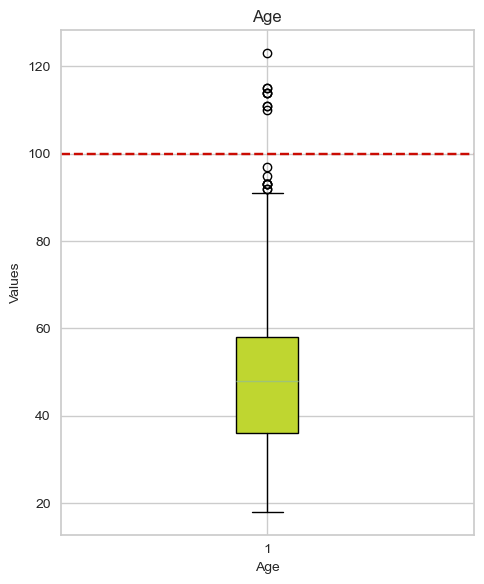

In [504]:
df_age_non_null = df.dropna(subset=['Age'])

plot_boxplots(
    dfs=[df_age_non_null],
    columns=['Age'],
    titles=['Age'],
    vertical_lines=[100]
)

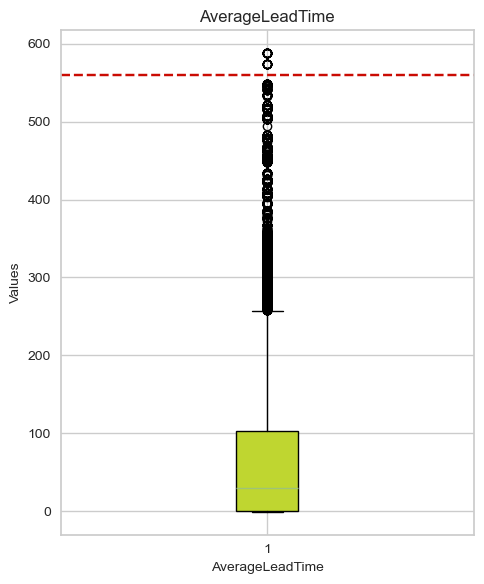

In [505]:
plot_boxplots(
    dfs=[df],
    columns=['AverageLeadTime'],
    titles=['AverageLeadTime'],
    vertical_lines=[560]
)

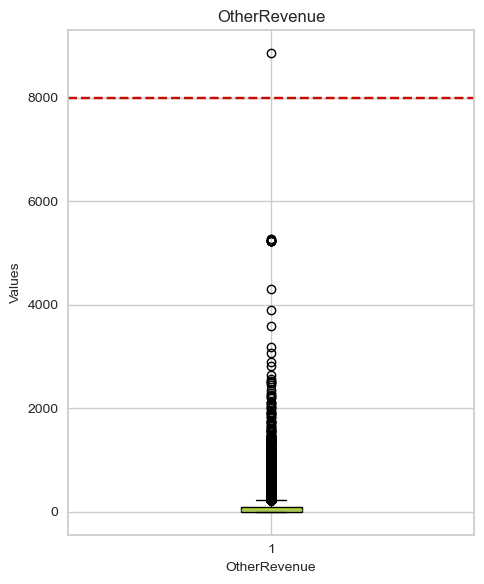

In [506]:
plot_boxplots(
    dfs=[df],
    columns=['OtherRevenue'],
    titles=['OtherRevenue'],
    vertical_lines=[8000]
)

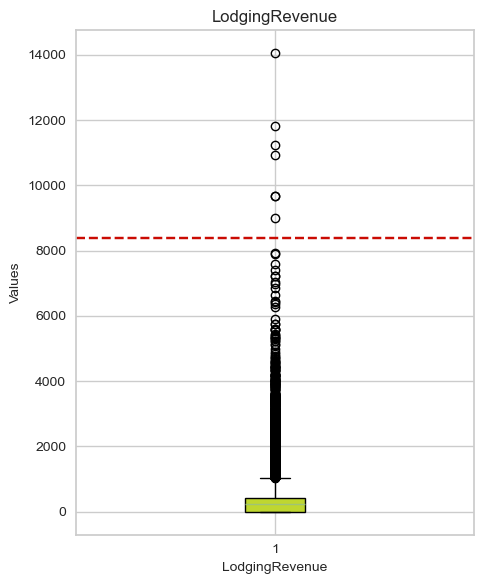

In [507]:
plot_boxplots(
    dfs=[df],
    columns=['LodgingRevenue'],
    titles=['LodgingRevenue'],
    vertical_lines=[8400]
)

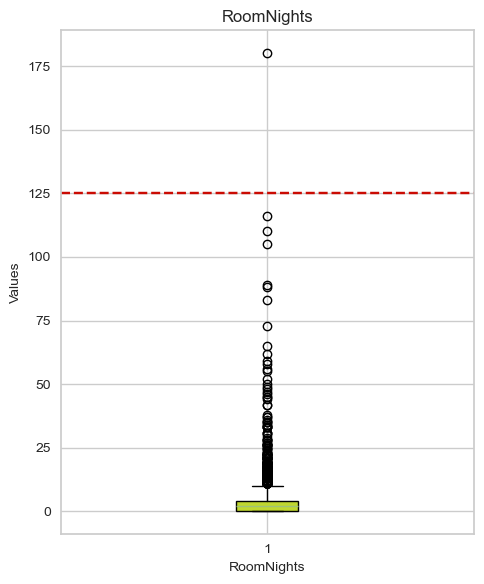

In [508]:
plot_boxplots(
    dfs=[df],
    columns=['RoomNights'],
    titles=['RoomNights'],
    vertical_lines=[125]
)

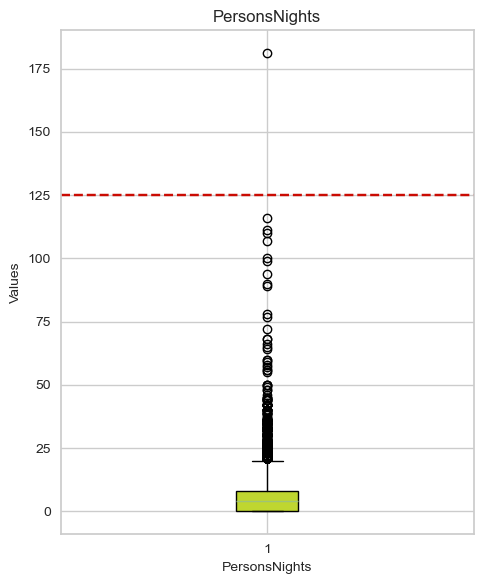

In [509]:
plot_boxplots(
    dfs=[df],
    columns=['PersonsNights'],
    titles=['PersonsNights'],
    vertical_lines=[125]
)

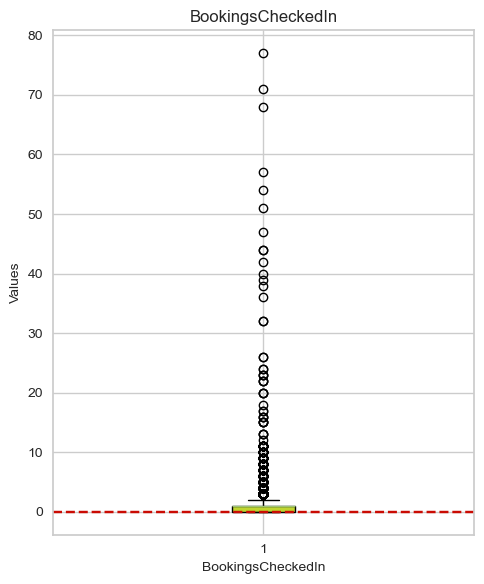

In [510]:
plot_boxplots(
    dfs=[df],
    columns=['BookingsCheckedIn'],
    titles=['BookingsCheckedIn'],
    vertical_lines=[0]
)

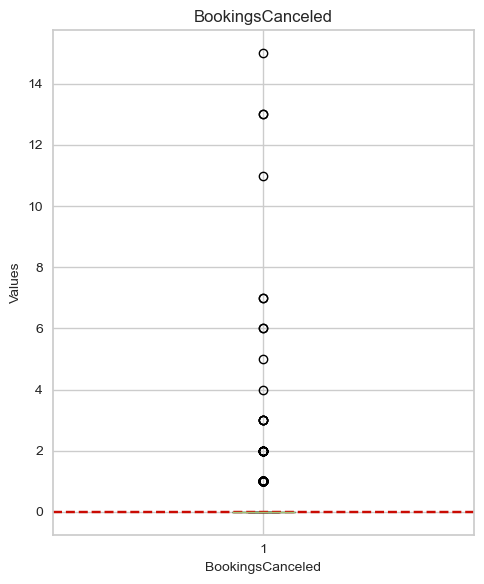

In [511]:
plot_boxplots(
    dfs=[df],
    columns=['BookingsCanceled'],
    titles=['BookingsCanceled'],
    vertical_lines=[0]
)

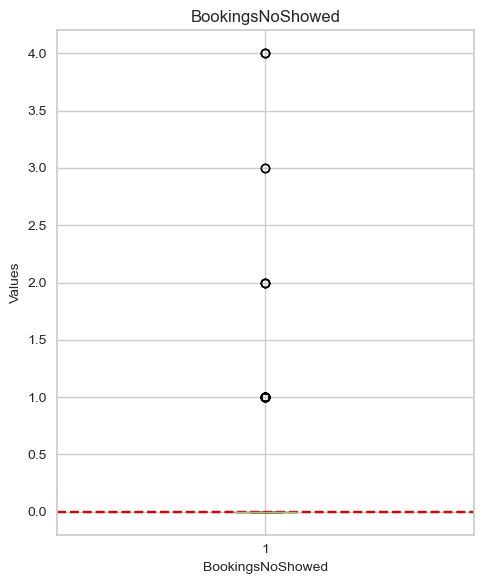

In [512]:
plot_boxplots(
    dfs=[df],
    columns=['BookingsNoShowed'],
    titles=['BookingsNoShowed'],
    vertical_lines=[0]
)

After observing the outliers the group found the best approach would be to manually filter out the outliers, since they don´t appeared to be many.

In [513]:
#Since we have few outliers we have decided to remove them manually
#Besides Age, where we decided based on general knowledge, the rest of the variables were based on the boxplots above

filters_outliers = (
    (df_outliers['Age'].between(0, 100) | df_outliers['Age'].isnull())  #Age higher than 100 is highly unlikely and probbaly a data entry error
    &
    (df_outliers['AverageLeadTime'].between(0, 560))
    &
    (df_outliers['OtherRevenue'] <= 8000) 
    &
    (df_outliers['RoomNights'] <= 125)
    &
    (df_outliers['LodgingRevenue'] <= 8400) 
    &
    (df_outliers['PersonsNights'] <= 125) 
)

df_filters_outliers = df_outliers[filters_outliers]
print('Percentage of data kept after removing outliers:', np.round(df_filters_outliers.shape[0] / df_outliers.shape[0], 4))

Percentage of data kept after removing outliers: 0.9994


The outliers only represent 0.0006% of our data so we will removed them since we find it acceptable by our standards

In [514]:
# Reset index after deleting outliers
df_filters_outliers.reset_index(drop=True, inplace=True)

In [515]:
# Update the our main df with the changes 
df= df_filters_outliers.copy()

## Missing Values

The group decided to check for missing values in order to conclude the data cleaning process.

In [516]:
df_mv = df.copy()

In [517]:
df_mv

,DocIDHash,NameHash,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,FRA,60,480,64.0,495.0,162.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,DEU,54,1197,14.0,695.0,100.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...,USA,34,120,0.0,0.0,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,ESP,53,755,56.0,165.0,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0x0002DE82570CC9C1FCB011BB15EA98B1004D32F55DCE...,0x211CC8BA0A935EF6BDD5DC7B68E071C8FAA9E290F7D6...,FRA,43,547,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98978,0xFFFB1DBFAB9D8FFDC8602C6D365578FBFF637070F3EB...,0xC96442DFC501BAF021CB0FE9CC15C1C22A98B8672FAF...,USA,49,123,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
98979,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,CAN,41,783,58.0,218.0,14.0,0,0,...,0,0,0,0,0,0,0,0,0,0
98980,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,FRA,19,46,89.0,911.7,31.0,0,0,...,0,0,0,0,1,0,0,0,0,0
98981,0xFFFED0F2BC7D4A410C579CEE04804A70F09C1B21B340...,0x5CF6B8387455E82BC6A2BCD111C0117527AEA2B37BDC...,IRL,26,507,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [518]:
df_mv.isna().sum()

DocIDHash                 0
NameHash                  0
Nationality               0
Age                     298
DaysSinceCreation         0
AverageLeadTime           0
LodgingRevenue            0
OtherRevenue              0
BookingsCanceled          0
BookingsNoShowed          0
BookingsCheckedIn         0
PersonsNights             0
RoomNights                0
DistributionChannel       0
MarketSegment             0
SRHighFloor               0
SRLowFloor                0
SRAccessibleRoom          0
SRMediumFloor             0
SRBathtub                 0
SRShower                  0
SRCrib                    0
SRKingSizeBed             0
SRTwinBed                 0
SRNearElevator            0
SRAwayFromElevator        0
SRNoAlcoholInMiniBar      0
SRQuietRoom               0
dtype: int64

As seen above the data set contains 298 missing values in the variable `Age`.

The group decided to fill the missing values in `Age` using the median values grouped by the variables `Nationality` and `DistributionChannel`. This approach was chosen to improve accuracy given the circumstances, ensuring more reliable results and a clear reason behind the decision.

In [519]:
# Calculate the median age grouped by nationality and DistributionChannel
median_age_by_group = df_mv.groupby(['Nationality', 'DistributionChannel'])['Age'].median()

# Impute missing values in 'Age' with the median age for each group
for (nationality, channel), median_age in median_age_by_group.items():
    df_mv.loc[(df_mv['Nationality'] == nationality) & 
              (df_mv['DistributionChannel'] == channel) & 
              (df_mv['Age'].isnull()), 'Age'] = int(median_age)

# Display the DataFrame to verify the changes
df_mv

,DocIDHash,NameHash,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,FRA,60,480,64.0,495.0,162.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,DEU,54,1197,14.0,695.0,100.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...,USA,34,120,0.0,0.0,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,ESP,53,755,56.0,165.0,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0x0002DE82570CC9C1FCB011BB15EA98B1004D32F55DCE...,0x211CC8BA0A935EF6BDD5DC7B68E071C8FAA9E290F7D6...,FRA,43,547,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98978,0xFFFB1DBFAB9D8FFDC8602C6D365578FBFF637070F3EB...,0xC96442DFC501BAF021CB0FE9CC15C1C22A98B8672FAF...,USA,49,123,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
98979,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,CAN,41,783,58.0,218.0,14.0,0,0,...,0,0,0,0,0,0,0,0,0,0
98980,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,FRA,19,46,89.0,911.7,31.0,0,0,...,0,0,0,0,1,0,0,0,0,0
98981,0xFFFED0F2BC7D4A410C579CEE04804A70F09C1B21B340...,0x5CF6B8387455E82BC6A2BCD111C0117527AEA2B37BDC...,IRL,26,507,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [520]:
#Make sure the missing values were properly imputed
df_mv['Age'].isna().sum()

0

In [521]:
#Update the main df 

df=df_mv.copy()

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 5. Features
    

</div>

**For Kmeans we should use features that can be measure such as**:
- Age
- DaysSinceCreation
- AverageLeadTime
- LodgingRevenue
- OtherRevenue
- PersonsNights
- RoomNights
- Bookings

In [522]:
#Create a copy of the df to start the feature engineering process
df_eng=df.copy()

The group created the following dictionary to group `Nationalities`  by region, enabling us to later assign them to clusters. The grouping was based on geographical regions to ensure meaningful segmentation.

In [523]:
regions_world = {
    "Western Europe": ["AUT", "BEL", "FRA", "DEU", "LIE", "LUX", "MCO", "NLD", "CHE"],
    "Northern Europe": ["DNK", "EST", "FIN", "ISL", "IRL", "LVA", "LTU", "NOR", "SWE", "GBR", "FRO", "JEY", "SJM", "SPM"],
    "Southern Europe": ["AND", "BGR", "HRV", "CYP", "GRC", "ITA", "MLT", "PRT", "ROU", "SMR", "SVN", "ESP"],
    "Central and Eastern Europe": ["ALB", "BIH", "BLR", "CZE", "HUN", "MDA", "MKD", "MNE", "POL", "RUS", "SRB", "SVK", "TUR", "UKR"],
    "Central and South America": ["ARG", "BOL", "BRA", "CHL", "COL", "CRI", "CUB", "DMA", "DOM", "ECU", "GTM", "GUY", "HND", "JAM",
                                  "NIC", "PAN", "PRY", "PER", "SLV", "SUR", "TTO", "URY", "VEN"],
    "North America": ["CAN", "MEX", "USA"],
    "Asia": ["AFG", "ARE", "ARM", "AZE", "BGD", "BHR", "BRN", "BTN", "CHN", "GEO", "HKG", "IND", "IDN", "IRN", "IRQ", "ISR", "JPN",
             "JOR", "KAZ", "KGZ", "KOR", "KWT", "LAO", "LBN", "LKA", "MAC", "MYS", "MMR", "MNG", "NPL", "OMN", "PAK", "PHL", "QAT",
             "SAU", "SGP", "SYR", "THA", "TJK", "TKM", "TLS", "TWN", "UZB", "VNM", "YEM"],
    "Africa": ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", "CAF", "TCD", "COM", "COG", "CIV", "DJI", "EGY", "GNQ", "ERI",
               "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", "MUS", "MAR", "MOZ",
               "NAM", "NER", "NGA", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "SWZ", "TZA", "TGO", "TUN", "UGA", "ZWE", 
               "RWA", "COD"],
    "Oceania": ["AUS", "FJI", "GUM", "KIR", "MNP", "NCL", "NZL", "PNG", "SLB", "VUT", "PYF", "WSM", "WLF"],
    "Other": ["ATA", "ATF", "PCN", "ASM", "UMI"]
}

Create variable `Region` based on the previous dictionary.

In [524]:
# Create a column with the continent of each country
df_eng['Region'] = df['Nationality'].apply(lambda x: next((k for k, v in regions_world.items() if x in v), 'Unknown'))
df_eng

,DocIDHash,NameHash,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Region
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,FRA,60,480,64.0,495.0,162.0,0,0,...,0,0,0,1,0,0,0,0,1,Western Europe
1,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,DEU,54,1197,14.0,695.0,100.0,0,0,...,0,0,0,1,0,0,0,0,0,Western Europe
2,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...,USA,34,120,0.0,0.0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,North America
3,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,ESP,53,755,56.0,165.0,12.0,0,0,...,0,0,0,0,0,0,0,0,0,Southern Europe
4,0x0002DE82570CC9C1FCB011BB15EA98B1004D32F55DCE...,0x211CC8BA0A935EF6BDD5DC7B68E071C8FAA9E290F7D6...,FRA,43,547,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98978,0xFFFB1DBFAB9D8FFDC8602C6D365578FBFF637070F3EB...,0xC96442DFC501BAF021CB0FE9CC15C1C22A98B8672FAF...,USA,49,123,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,North America
98979,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,CAN,41,783,58.0,218.0,14.0,0,0,...,0,0,0,0,0,0,0,0,0,North America
98980,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,FRA,19,46,89.0,911.7,31.0,0,0,...,0,0,0,1,0,0,0,0,0,Western Europe
98981,0xFFFED0F2BC7D4A410C579CEE04804A70F09C1B21B340...,0x5CF6B8387455E82BC6A2BCD111C0117527AEA2B37BDC...,IRL,26,507,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,1,Northern Europe


The group created `Age` bins to categorize different age ranges, facilitating segmentation and allowing for more meaningful analysis.

In [525]:
bins = [18,26, 39, 55, 73, 101]
labels = ['Young Adults', 'Adults', 'Older Adults', 'Seniors', 'Eldery']
df_eng['AgeGroup'] = pd.cut(df_eng['Age'], bins=bins, labels=labels, right=False)

# To visualize the bin distribution
df_eng['AgeGroup'].value_counts()

AgeGroup
Older Adults    36414
Seniors         27451
Adults          22923
Young Adults     6174
Eldery           6021
Name: count, dtype: int64

The group created the variable `TotalRevenue` to consolidate the information from the `LodgingRevenue` and `OtherRevenue` variables, simplifying the dataset and improving clarity.









In [526]:
# Accounts for total revenue
df_eng['TotalRevenue'] = df_eng['LodgingRevenue'] + df_eng['OtherRevenue']

The variable `TotalPreferences` represents the sum of all `SR` variables, allowing us to determine the total number of special requests made by a customer.

In [527]:

df_eng['TotalPreferences'] = df_eng['SRHighFloor'] + df_eng['SRLowFloor'] + df_eng['SRAccessibleRoom'] + df_eng['SRMediumFloor'] + df_eng['SRBathtub'] + df_eng['SRShower'] + df_eng['SRCrib'] + df_eng['SRKingSizeBed'] + df_eng['SRTwinBed'] + df_eng['SRNearElevator'] + df_eng['SRAwayFromElevator'] + df_eng['SRNoAlcoholInMiniBar'] + df_eng['SRQuietRoom']

The group created the variable `RoomRate` to calculate the revenue generated per room.

In [528]:
# Revenue Per Room
df_eng['RoomRate'] = (df_eng['LodgingRevenue']/df_eng['RoomNights']).round(2)

As expected, there are missing values in the RoomRate variable, particularly for customers who, as previously observed, do not have `LodgingRevenue`.

In [529]:
df_eng['RoomRate'].isna().sum()

25635

In order to be able to use the variable `RoomRate` we replaced the missing values for 0, as they represent the absence of 

In [530]:
df_eng['RoomRate'].replace(np.nan, 0, inplace=True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\1464631189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eng['RoomRate'].replace(np.nan, 0, inplace=True)


In [531]:
df_eng['RoomRate'].describe()

count    98983.000000
mean        97.686498
std         96.913654
min          0.000000
25%          0.000000
50%         89.000000
75%        130.245000
max       2151.000000
Name: RoomRate, dtype: float64

The group created variable `RoomRate_cat` in order to categorize the values in variable `RoomRate`.

In [532]:
def categorize_clients(df_eng):
    # Define the conditions for each category
    conditions = [
        (df_eng['RoomRate'] > 144),
        ((df_eng['RoomRate'] > 109) & (df_eng['RoomRate'] <= 144)),
        ((df_eng['RoomRate'] >= 84) & (df_eng['RoomRate'] <= 109)),
        (df_eng['RoomRate'] < 84) 
    ]

    # Define the corresponding category labels
    categories = ['Luxury Client', 'Medium-High Client', 'Medium-Low Client', 'Lower Price Preference Client']

    # Use np.select to assign categories based on conditions
    df_eng['RoomRate_cat'] = np.select(conditions, categories, default='Unknown')
    
    return df_eng

# Call the function after defining df_fe and binary_features
df_eng = categorize_clients(df_eng)

The variable `TotalBookings` contains the information of all of the Booking variables.

In [533]:
df_eng['TotalBookings'] = df_eng['BookingsCanceled'] + df_eng['BookingsNoShowed'] + df_eng['BookingsCheckedIn']

The variable `CancelRate` indicates how many bookings were canceled.

In [534]:
df_eng['CancelRate'] = (df_eng['BookingsCanceled']/df_eng['TotalBookings'])*100

Once again we found missing values do to the customers that didn´t engaged at all with the hotel as seen above

In [535]:
df_eng['CancelRate'].isna().sum()

25634

The group decided to replace the missing values with 0, as they represent the absence of a recorded value.

In [536]:
df_eng['CancelRate'].replace(np.nan, 0, inplace=True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\1537382014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eng['CancelRate'].replace(np.nan, 0, inplace=True)


The variable `YearsSinceCreation` converts `DaysSinceCreation` into years, improving interpretability, especially for high values in `DaysSinceCreation`.









In [537]:
# Transforming the variable 'DaysSinceCreation' so it can give us the number of years instead of the number of days
df_eng['YearsSinceCreation'] = (df_eng['DaysSinceCreation'] / 365).round(2)

The group created variable `NPeoplePerRoom` to have an estimation of how many people stay in each room.

In [538]:
df_eng['NPeoplePerRoom'] = df_eng['PersonsNights'] / df_eng['RoomNights']

Once again we found missing values do to the customers that didn´t engaged at all with the hotel as seen above

In [539]:
df_eng['NPeoplePerRoom'].isna().sum()

25635

The group decided to replace the missing values with 0, as they represent the absence of a recorded value.

In [540]:
df_eng['NPeoplePerRoom'].replace(np.nan, 0, inplace=True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\915033754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eng['NPeoplePerRoom'].replace(np.nan, 0, inplace=True)


The variable `RevenuePerBooking` indicates the Total Revenue generated by each Booking Checkedin.

In [541]:
df_eng['RevenuePerBooking'] = (df_eng['TotalRevenue']/(df_eng['BookingsCheckedIn']))

Once again we found missing values do to the customers that didn´t engaged at all with the hotel as seen above

In [542]:
df_eng['RevenuePerBooking'].isna().sum()

25635

The group decided to replace the missing values with 0, as they represent the absence of a recorded value.

In [543]:
df_eng['RevenuePerBooking'].replace(np.nan, 0, inplace=True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\2224752394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eng['RevenuePerBooking'].replace(np.nan, 0, inplace=True)


The group created the variable `HasPreference` which indicates whether or not a customer made any sort of Special Request.

In [544]:
df_eng['HasPreference'] = df_eng[sr_columns].apply(lambda x: 'Yes' if x.any() else 'No', axis=1)

The group created the variable `LeadTimeInterval` by defining bins to categorize different segments of `AverageLeadTime`, facilitating analysis and interpretation.

In [545]:
bins = [0, 1, 7, 14, 30, 60, 90, 588]
labels = ['0-1 days', '2-7 days', '8-14 days', '15-30 days', '31-60 days', '61-90 days', '> 3 months']

df_eng['LeadTimeInterval'] = pd.cut(df_eng['AverageLeadTime'], bins=bins, labels=labels, right=True, include_lowest=True)

In [546]:
#Update the main df with the new features
df=df_eng.copy()

In [547]:
df

,DocIDHash,NameHash,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,TotalPreferences,RoomRate,RoomRate_cat,TotalBookings,CancelRate,YearsSinceCreation,NPeoplePerRoom,RevenuePerBooking,HasPreference,LeadTimeInterval
0,0x00006E606D590F336C289D2CC995A0C726878BCAC001...,0x0D54EA6B14A0574CAA2D3802565441048C5C831EB035...,FRA,60,480,64.0,495.0,162.0,0,0,...,2,165.00,Luxury Client,2,0.0,1.32,2.0,328.5,Yes,61-90 days
1,0x0000E25BC06E730F6DDD6BD53CBFE05BABD2B0182019...,0xF33C33AE994E1AE82D574B2BF23945DC93A9D9CC89FE...,DEU,54,1197,14.0,695.0,100.0,0,0,...,2,139.00,Medium-High Client,1,0.0,3.28,2.0,795.0,Yes,8-14 days
2,0x0001425DE03D204F30757BA2E50DBD0486ED254E1E6F...,0x42FC523622627DB3F09A6A544335CDAF2EDA9C57BA61...,USA,34,120,0.0,0.0,0.0,0,0,...,3,0.00,Lower Price Preference Client,0,0.0,0.33,0.0,0.0,Yes,0-1 days
3,0x0002DDD31332B77DA9499876CD3577B08844812E95F2...,0xFBF00BE3E81247CCA400CC838DCDCF0E4C537B98FDA9...,ESP,53,755,56.0,165.0,12.0,0,0,...,0,165.00,Luxury Client,1,0.0,2.07,3.0,177.0,No,31-60 days
4,0x0002DE82570CC9C1FCB011BB15EA98B1004D32F55DCE...,0x211CC8BA0A935EF6BDD5DC7B68E071C8FAA9E290F7D6...,FRA,43,547,0.0,0.0,0.0,0,0,...,1,0.00,Lower Price Preference Client,0,0.0,1.50,0.0,0.0,Yes,0-1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98978,0xFFFB1DBFAB9D8FFDC8602C6D365578FBFF637070F3EB...,0xC96442DFC501BAF021CB0FE9CC15C1C22A98B8672FAF...,USA,49,123,0.0,0.0,0.0,0,0,...,0,0.00,Lower Price Preference Client,0,0.0,0.34,0.0,0.0,No,0-1 days
98979,0xFFFB9FE60E0D35B8426F2FB90646D0BA799B803A79C1...,0x342C21783C3293511503091DCBCD4EB112AB13C2CD46...,CAN,41,783,58.0,218.0,14.0,0,0,...,0,109.00,Medium-Low Client,1,0.0,2.15,1.0,232.0,No,31-60 days
98980,0xFFFE14C4D0D6520C97125A115CDC705B8A2F0E5133D5...,0xFD4A86C21CE0E27CFDF3ED6BFAF83F6B288657F972A2...,FRA,19,46,89.0,911.7,31.0,0,0,...,1,130.24,Medium-High Client,1,0.0,0.13,2.0,942.7,Yes,61-90 days
98981,0xFFFED0F2BC7D4A410C579CEE04804A70F09C1B21B340...,0x5CF6B8387455E82BC6A2BCD111C0117527AEA2B37BDC...,IRL,26,507,0.0,0.0,0.0,0,0,...,3,0.00,Lower Price Preference Client,0,0.0,1.39,0.0,0.0,Yes,0-1 days


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 6. Encoding and Scaling
    

</div>

Organize the variables in order to facilitate the following steps.

In [548]:
non_metric_features = ['Nationality',
                       'Region',
                       'DistributionChannel',
                       'RoomRate_cat',
                       'AgeGroup',
                       'LeadTimeInterval']

metric_features = ['Age',
                   'AverageLeadTime',
                   'DaysSinceCreation',
                   'LodgingRevenue',
                   'OtherRevenue',
                   'BookingsCanceled',
                   'BookingsNoShowed',
                   'BookingsCheckedIn',
                   'PersonsNights',
                   'RoomNights',
                   'YearsSinceCreation',
                   'TotalRevenue',
                   'TotalBookings',
                   'TotalPreferences',
                   'CancelRate',
                   'RevenuePerBooking',
                   'RoomRate',
                   'NPeoplePerRoom']

binary_features = ['SRHighFloor',
                   'SRCrib',
                   'SRKingSizeBed',
                   'SRTwinBed',
                   'SRQuietRoom',
                   'SRLowFloor',
                   'SRAccessibleRoom',
                   'SRMediumFloor',
                   'SRBathtub',
                   'SRShower',
                   'SRNearElevator',
                   'SRAwayFromElevator',
                   'SRNoAlcoholInMiniBar',
                   'HasPreference']

### Min Max Scaler

Considering the distribution of our data we found Min Max Scaler to be better suited.

In [549]:
df_scaled=df.copy()
og_df = df.copy()

In [550]:
scaler = MinMaxScaler()
df_scaled[metric_features] = scaler.fit_transform(df_scaled[metric_features])

In [551]:
df = df_scaled.copy()

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 7. Feature Selection
    

</div>

In [552]:
#Create the a copy of the df  
df_fselection = df.copy()

Drop the features deemed as not relevant previously.

In [553]:
drop_list = ['DocIDHash', 'NameHash', 'MarketSegment']
df_fselection.drop(drop_list, axis=1, inplace=True)

### Metric Features

To create a correlation matrix and assess the relevance of features for clustering, the group generated a heatmap showing the correlation between variables.




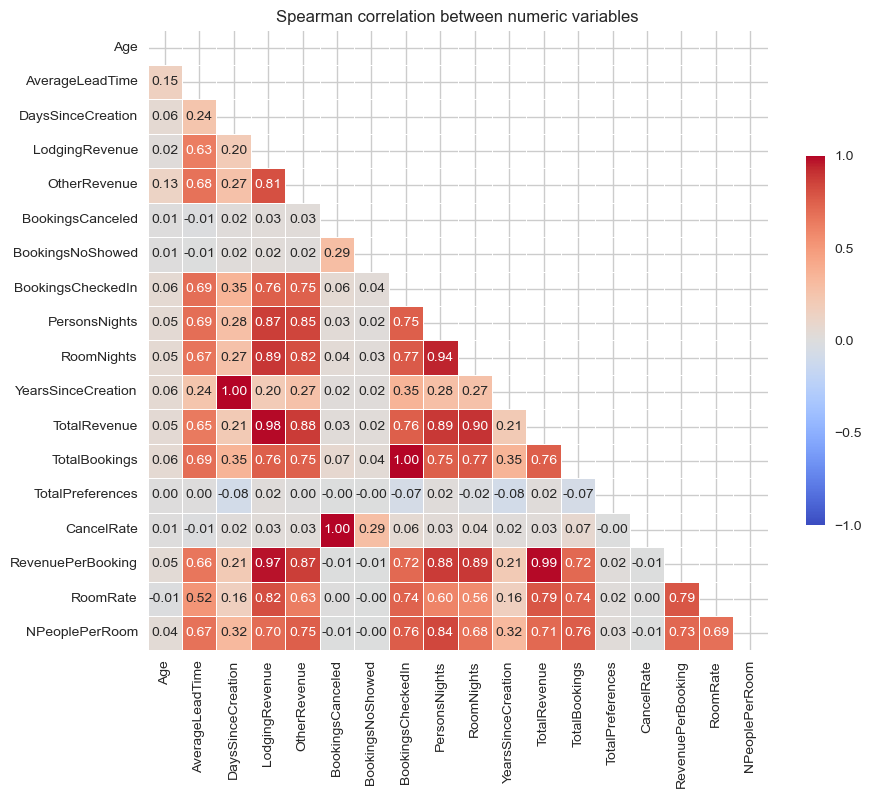

In [554]:
# CORRELATION 

# Create correlation matrix
corr = df_fselection[metric_features].corr(method='spearman')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(10, 12))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = 0.5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=12)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left':True})

The group conducted an analysis to check features highly correlated (>0.90).

In [555]:
threshold = 0.9
correlated_features = []

for column in corr.columns:
    for row in corr.index:
        if abs(corr.loc[row, column]) > threshold and row != column:
            correlated_features.append((row, column, corr.loc[row, column]))

for i in correlated_features:
    print(i)

('YearsSinceCreation', 'DaysSinceCreation', 0.999994819653956)
('TotalRevenue', 'LodgingRevenue', 0.984533703014462)
('RevenuePerBooking', 'LodgingRevenue', 0.9709131449891222)
('CancelRate', 'BookingsCanceled', 0.9999995682529745)
('TotalBookings', 'BookingsCheckedIn', 0.9996272455196102)
('RoomNights', 'PersonsNights', 0.9424968347156196)
('PersonsNights', 'RoomNights', 0.9424968347156196)
('DaysSinceCreation', 'YearsSinceCreation', 0.999994819653956)
('LodgingRevenue', 'TotalRevenue', 0.984533703014462)
('RevenuePerBooking', 'TotalRevenue', 0.9866210394498899)
('BookingsCheckedIn', 'TotalBookings', 0.9996272455196102)
('BookingsCanceled', 'CancelRate', 0.9999995682529745)
('LodgingRevenue', 'RevenuePerBooking', 0.9709131449891222)
('TotalRevenue', 'RevenuePerBooking', 0.9866210394498899)


After analysis we dropped the features `YearsSinceCreation`, `TotalRevenue`, `RevenuePerBooking`, `BookingsCanceled`, `TotalBookings` and `RoomNights`.

In [556]:
drop_metric = ['YearsSinceCreation',
               'TotalRevenue',
               'RevenuePerBooking',
               'BookingsCanceled', 
               'TotalBookings',
               'RoomNights']

In [557]:
df_fselection.drop(columns = drop_metric, inplace = True)

In [558]:
# Updating the list of metric_features

for feature in drop_metric:
    metric_features.remove(feature)

Re-run the process to filter out more features

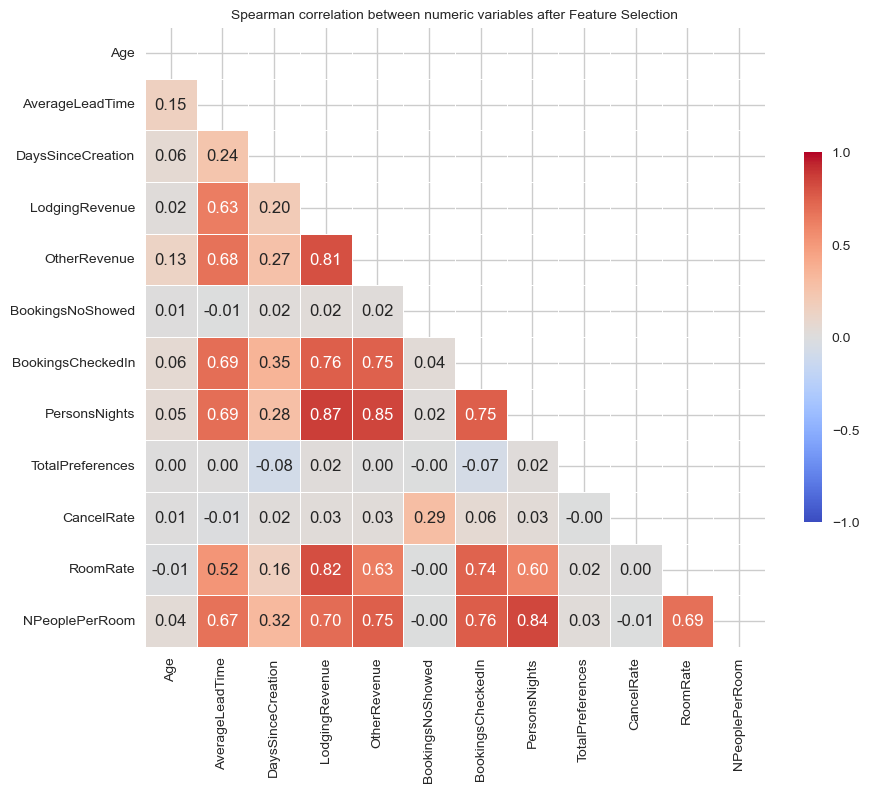

In [559]:
# CORRELATION 


# Create correlation matrix
corr = df_fselection[metric_features].corr(method='spearman')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(10, 12))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = 0.5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Decoration
plt.title("Spearman correlation between numeric variables after Feature Selection", fontsize=10)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left':True})

In [583]:
drop_metric = ['TotalPreferences', 'BookingsNoShowed']

df_fselection.drop(columns = drop_metric, inplace = True)


# Updating the list of metric_features
for feature in drop_metric:
    metric_features.remove(feature)

KeyError: "['TotalPreferences', 'BookingsNoShowed'] not found in axis"

Check the variance of each variable to ensure that all features are valuable and provide distinct information.

In [561]:
df_fselection[metric_features].var()

Age                  0.036276
AverageLeadTime      0.024665
DaysSinceCreation    0.076834
LodgingRevenue       0.002383
OtherRevenue         0.000560
BookingsCheckedIn    0.000129
PersonsNights        0.001738
CancelRate           0.000105
RoomRate             0.002030
NPeoplePerRoom       0.029315
dtype: float64

### Non Metric Features

The group decided to remove all `SR` features, as the majority were highly imbalanced, predominantly favoring 0 (No) in the binary distribution.

In [562]:
# Updating the list of binary_features

remove_binary = ['SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 
                     'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar']

for feature in remove_binary:
    binary_features.remove(feature)

In [563]:
df_fselection.drop(columns = remove_binary, inplace=True)

In [564]:
df=df_fselection.copy()

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 8. Models
    

</div>

### K-means

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98983 entries, 0 to 98982
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Nationality          98983 non-null  object  
 1   Age                  98983 non-null  float64 
 2   DaysSinceCreation    98983 non-null  float64 
 3   AverageLeadTime      98983 non-null  float64 
 4   LodgingRevenue       98983 non-null  float64 
 5   OtherRevenue         98983 non-null  float64 
 6   BookingsCheckedIn    98983 non-null  float64 
 7   PersonsNights        98983 non-null  float64 
 8   DistributionChannel  98983 non-null  object  
 9   SRHighFloor          98983 non-null  int64   
 10  SRCrib               98983 non-null  int64   
 11  SRKingSizeBed        98983 non-null  int64   
 12  SRTwinBed            98983 non-null  int64   
 13  SRQuietRoom          98983 non-null  int64   
 14  Region               98983 non-null  object  
 15  AgeGroup           

K-means - metric features

In [567]:
metrics_to_use = ['AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'NPeoplePerRoom', 'PersonsNights', 'RoomRate', 'CancelRate']

In [568]:
df_km_mf = df[metrics_to_use].copy()

In [569]:
#df_km_mf = df[metric_features].copy()

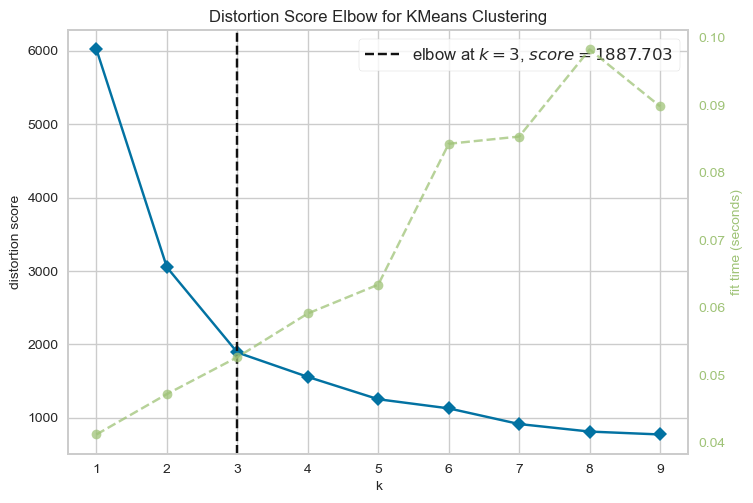

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [570]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,10), random_state=123)
visualizer.fit(df_km_mf)
visualizer.show()

In [571]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init= 200, random_state=123)
allDistances = kmeans.fit_transform(df_km_mf)
labels_kmeans = kmeans.predict(df_km_mf)

In [574]:
# Assuming `labels` contains your cluster assignments
unique, counts = np.unique(labels_kmeans, return_counts=True)
cluster_distribution = dict(zip(unique, counts))

cluster_distribution

{0: 38516, 1: 41750, 2: 18717}

In [575]:
# from yellowbrick.cluster import SilhouetteVisualizer

# # Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

# visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# visualizer.fit(df_km_mf)
# visualizer.show()

In [576]:
def cluster_profiles(df, label_columns, figsize,
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compare_titles is None:
        compare_titles = [""] * len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns),
                             ncols=2,
                             figsize=figsize,
                             constrained_layout=True,
                             squeeze=False)

    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i != label]
        dfax = df.drop(drop_cols, axis=1)

        # Separate continuous and categorical columns
        continuous_columns = dfax.select_dtypes(include=['number']).columns.tolist()
        categorical_columns = dfax.select_dtypes(exclude=['number']).columns.tolist()

        # For continuous variables, compute the centroids (mean) for each cluster
        centroids = dfax.groupby(by=label, as_index=False).mean()

        # For categorical variables, compute the mode (most frequent category)
        mode = dfax.groupby(by=label, as_index=False).agg(lambda x: x.mode()[0])

        # Count the size of each cluster
        counts = dfax.groupby(by=label, as_index=False).size()
        counts.columns = [label, "counts"]

        # Plot Parallel Coordinates for continuous features
        if len(continuous_columns) > 0:
            pd.plotting.parallel_coordinates(centroids,
                                             label,
                                             color=sns.color_palette(cmap),
                                             ax=ax[0])

        # Plot bar plots for categorical feature counts per cluster
        sns.barplot(x=label, 
                    hue=label,
                    y="counts", 
                    data=counts, 
                    ax=ax[1], 
                    palette=sns.color_palette(cmap),
                    legend=False)

        # Set Layout for Parallel Coordinates plot (for continuous data)
        if len(continuous_columns) > 0:
            handles, _ = ax[0].get_legend_handles_labels()
            cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
            ax[0].annotate(text=titl, xy=(0.95, 1.1), xycoords='axes fraction', fontsize=13, fontweight='heavy')
            ax[0].axhline(color="black", linestyle="--")
            ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
            ax[0].set_xticklabels(ax[0].get_xticklabels(),
                                  rotation=40,
                                  ha='right')
            ax[0].legend(handles, cluster_labels,
                         loc='center left', bbox_to_anchor=(1, 0.5), title=label)

        # Set Layout for Bar Plot (for categorical data)
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)

    plt.suptitle("Cluster Simple Profiling", fontsize=23)
    plt.show()

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_11060\414541185.py:44: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,


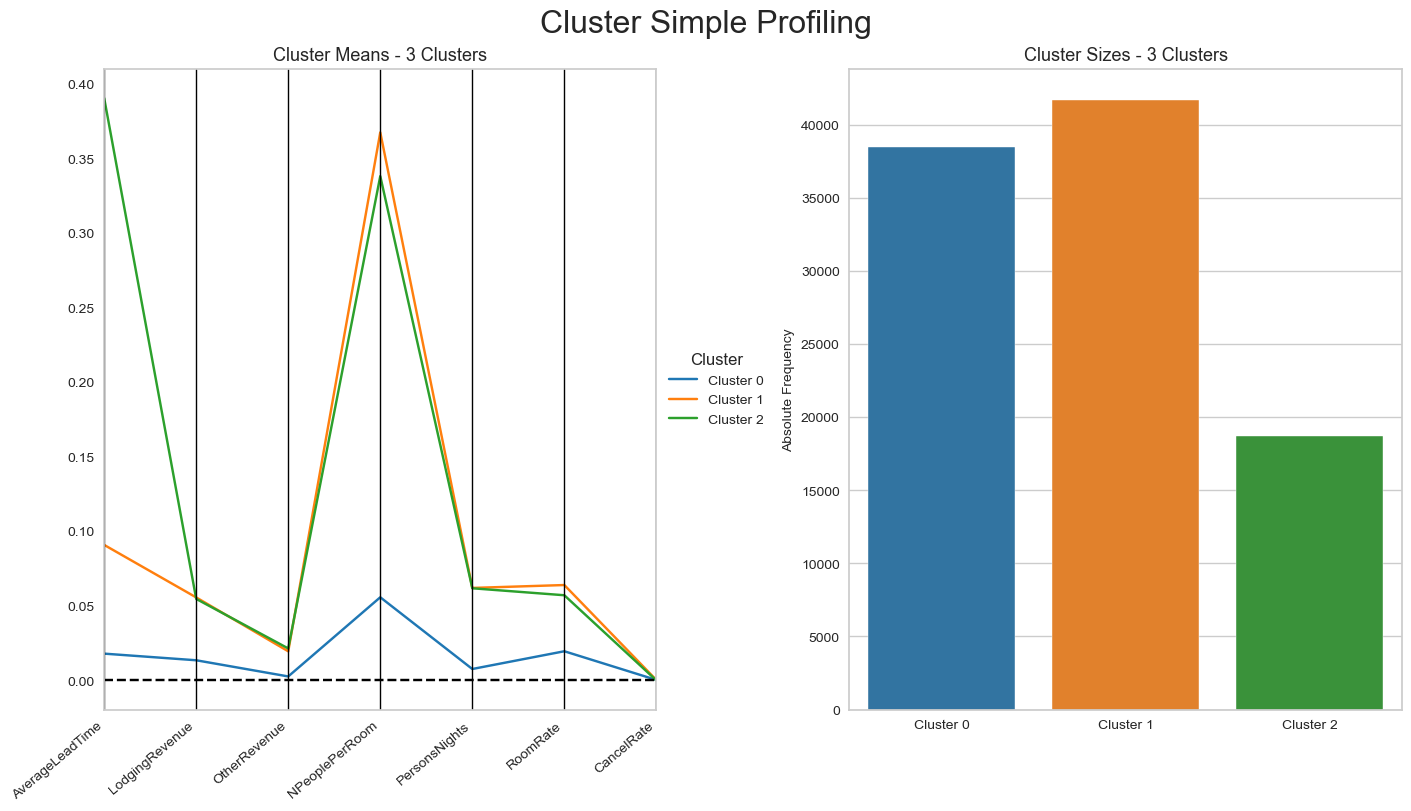

In [577]:
# Example usage of the function after K-means clustering
df_km_mf['Cluster'] = labels_kmeans  # Add the cluster labels to the dataframe

# Specify the column that contains the clustering labels
label_columns = ['Cluster']

# Call the function to plot the cluster profiles
cluster_profiles(df_km_mf, label_columns=label_columns, figsize=(14, 8), cmap="tab10")

In [578]:
# Assuming 'df_km_mf' is the dataframe used for clustering and 'df' is the full dataframe with all features

# Step 1: Assign cluster labels to 'df_km_mf' dataframe
df_km_mf['Cluster'] = kmeans.labels_

# Step 2: Merge the full dataframe 'df' with the cluster labels from 'df_km_mf'
df_full = df.join(df_km_mf['Cluster'])
og_df = og_df.join(df_km_mf['Cluster'])

# Step 3: Features for categorical analysis (list of categorical features from df)
categorical_features = ['Nationality', 'Region', 'DistributionChannel', 'RoomRate_cat', 'AgeGroup', 'LeadTimeInterval', 'HasPreference']

# Step 4: Calculate the mode for categorical features by cluster
df_grouped_categorical = df_full[categorical_features + ['Cluster']].groupby('Cluster').agg(lambda x: x.mode()[0])

# Step 5: Display the result as a table
print(df_grouped_categorical)

        Nationality          Region    DistributionChannel  \
Cluster                                                      
0               FRA  Western Europe  Travel Agent/Operator   
1               FRA  Western Europe  Travel Agent/Operator   
2               DEU  Western Europe  Travel Agent/Operator   

                          RoomRate_cat      AgeGroup LeadTimeInterval  \
Cluster                                                                 
0        Lower Price Preference Client  Older Adults         0-1 days   
1                        Luxury Client  Older Adults       31-60 days   
2                    Medium-Low Client       Seniors       > 3 months   

        HasPreference  
Cluster                
0                 Yes  
1                 Yes  
2                 Yes  


In [579]:
# Define the categorical features
categorical_features = ['Nationality', 'Region', 'DistributionChannel', 'RoomRate_cat', 'AgeGroup', 'LeadTimeInterval', 'HasPreference']

# Create a function to get the top 3 categories for each cluster along with their percentages
def get_top_3_categories_with_percentage(df, cluster_col, categorical_features):
    top_3_dict = {}
    for feature in categorical_features:
        top_3_dict[feature] = df.groupby(cluster_col)[feature].apply(lambda x: x.value_counts(normalize=True).head(3))
    return top_3_dict

# Get the top 3 categories for each cluster along with their percentages
top_3_categories_with_percentage = get_top_3_categories_with_percentage(df_full, 'Cluster', categorical_features)

# Display the results
for feature, top_3 in top_3_categories_with_percentage.items():
    print(f"Top 3 categories for {feature}:")
    print(top_3)
    print("\n")

Top 3 categories for Nationality:
Cluster     
0        FRA    0.140409
         DEU    0.131010
         GBR    0.104216
1        FRA    0.181677
         PRT    0.103880
         DEU    0.102156
2        DEU    0.250735
         GBR    0.142384
         FRA    0.124753
Name: Nationality, dtype: float64


Top 3 categories for Region:
Cluster                 
0        Western Europe     0.384723
         Southern Europe    0.209316
         Northern Europe    0.181795
1        Western Europe     0.403928
         Southern Europe    0.225653
         Northern Europe    0.167808
2        Western Europe     0.507881
         Northern Europe    0.212267
         Southern Europe    0.120105
Name: Region, dtype: float64


Top 3 categories for DistributionChannel:
Cluster  0                    
0        Travel Agent/Operator    0.786374
         Direct                   0.155883
         Corporate                0.043125
1        Travel Agent/Operator    0.831210
         Direct              

### Finding the leads/potential customers

In the EDA section, the group identified clients who had never made a booking before. These clients were treated as leads or potential customers and were kept in the database. This decision was based on the assumption that these customers had signed up for a loyalty program but had not yet made any reservations. This suggests that they have shown interest but have not yet completed a purchase. Now that the clients had been clustered, the group wanted to investigate where these customers ended up.

In [580]:
no_show_distribution = og_df[og_df['TotalBookings'] == 0]['Cluster'].value_counts()
no_show_distribution_df = no_show_distribution.reset_index()
no_show_distribution_df.columns = ['Cluster', 'Count']
no_show_distribution_df

,Cluster,Count
0,0,25633
1,2,1


It seems that, apart from one client who the group decided to ignore, all other leads are in cluster 0. THe group decided to once again analyse the line chart for the first cluster but this time with and without the leads.

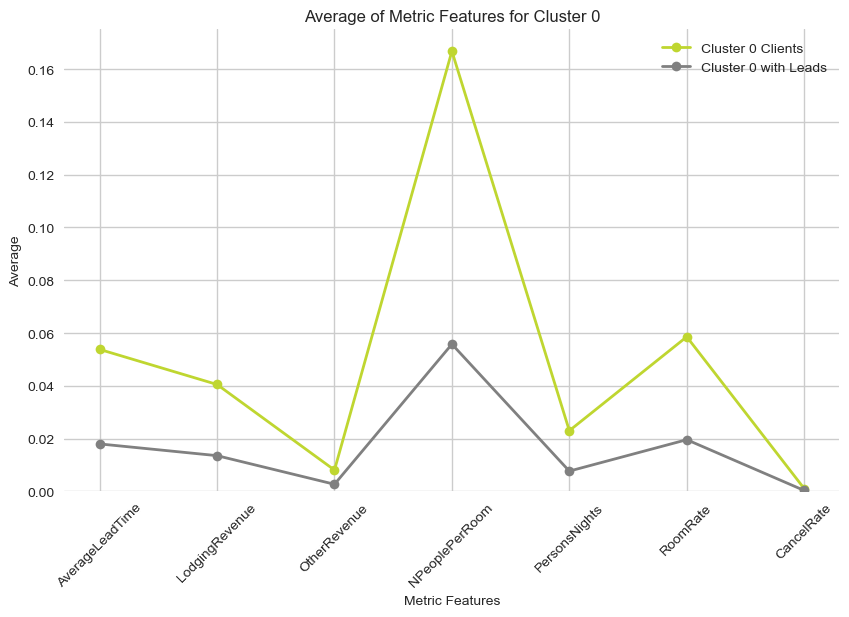

In [581]:

# Filter clusters
cluster0_clients = df_full[(og_df['TotalBookings'] > 0) & (og_df['Cluster'] == 0)]
cluster0_wleads = df_full[og_df['Cluster'] == 0]

# Compute mean for selected metrics
mean_clients = cluster0_clients[metrics_to_use].mean()
mean_wleads = cluster0_wleads[metrics_to_use].mean()

# Plot the means in a line chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(metrics_to_use, mean_clients, marker='o', linestyle='-', linewidth=2, label='Cluster 0 Clients', color = '#bfd630')
plt.plot(metrics_to_use, mean_wleads, marker='o', linestyle='-', linewidth=2, label='Cluster 0 with Leads', color = 'grey')

# Add titles and labels
plt.title('Average of Metric Features for Cluster 0')
plt.xlabel('Metric Features')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.legend()
sns.despine(bottom=True, left=True)
plt.ylim(0, 0.175)
plt.grid(True)
plt.show()

The values changed dramatically when the leads were removed from the cluster. Still this group remained the underperformer when compared to the other clusters.

<Figure size 1000x500 with 0 Axes>

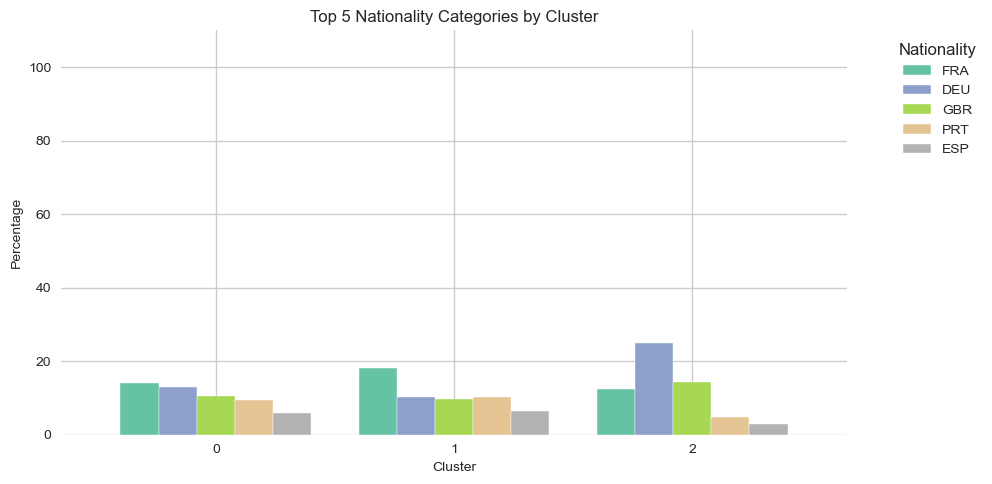

<Figure size 1000x500 with 0 Axes>

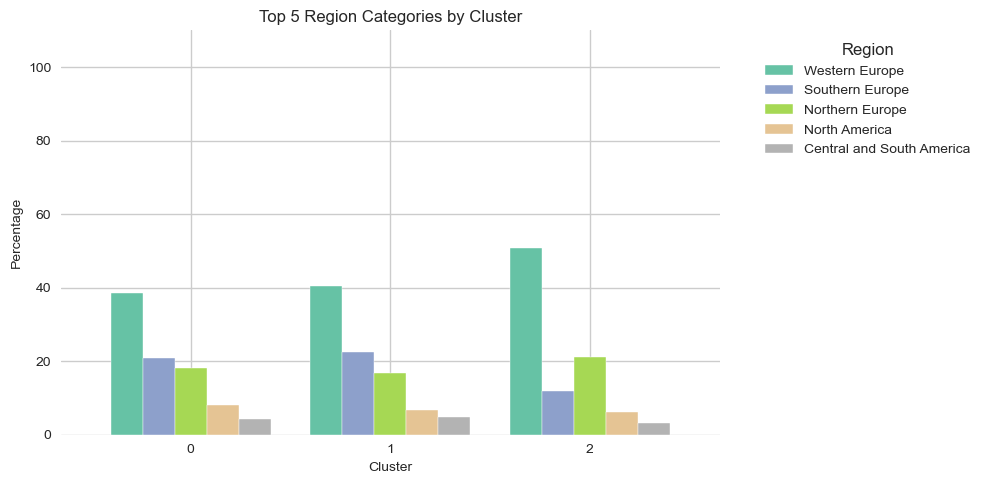

<Figure size 1000x500 with 0 Axes>

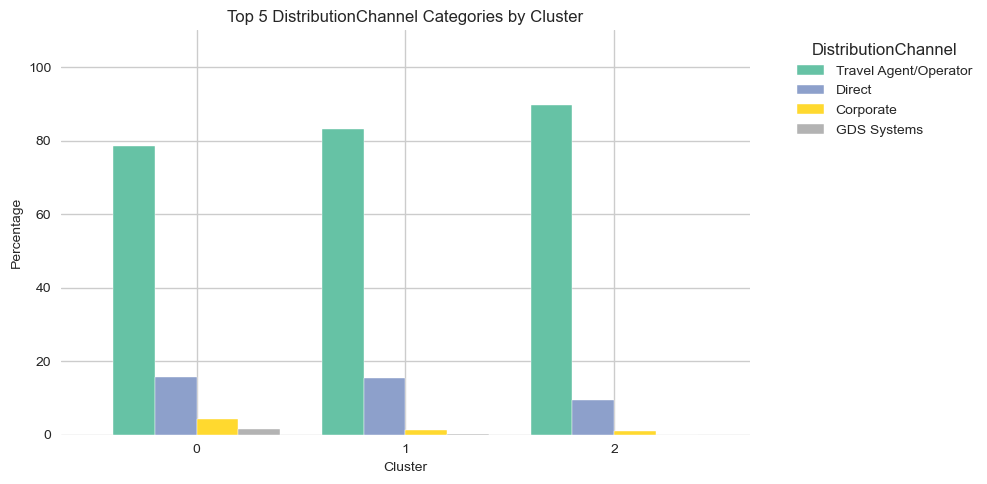

<Figure size 1000x500 with 0 Axes>

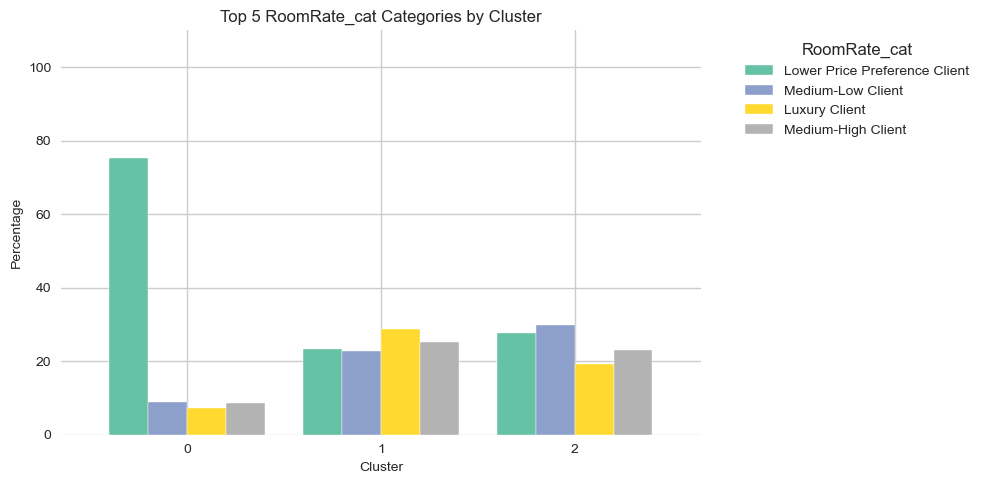

<Figure size 1000x500 with 0 Axes>

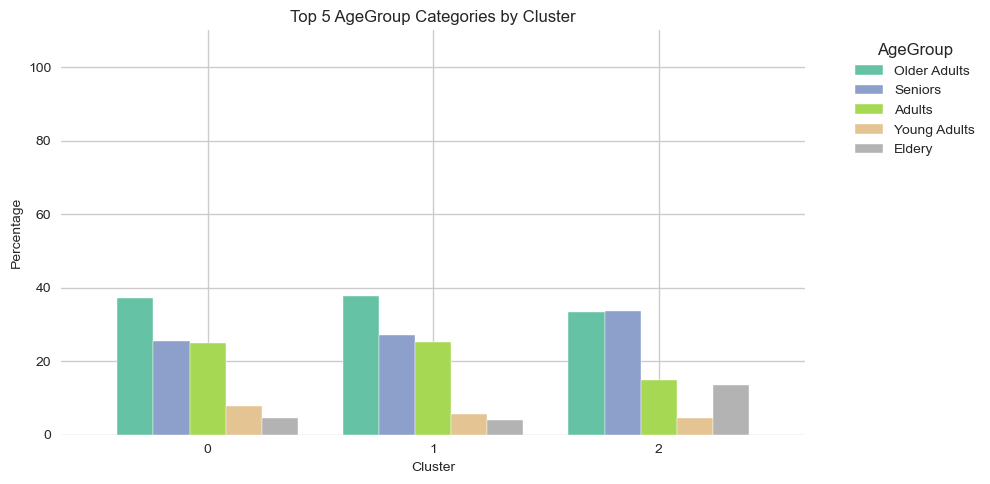

<Figure size 1000x500 with 0 Axes>

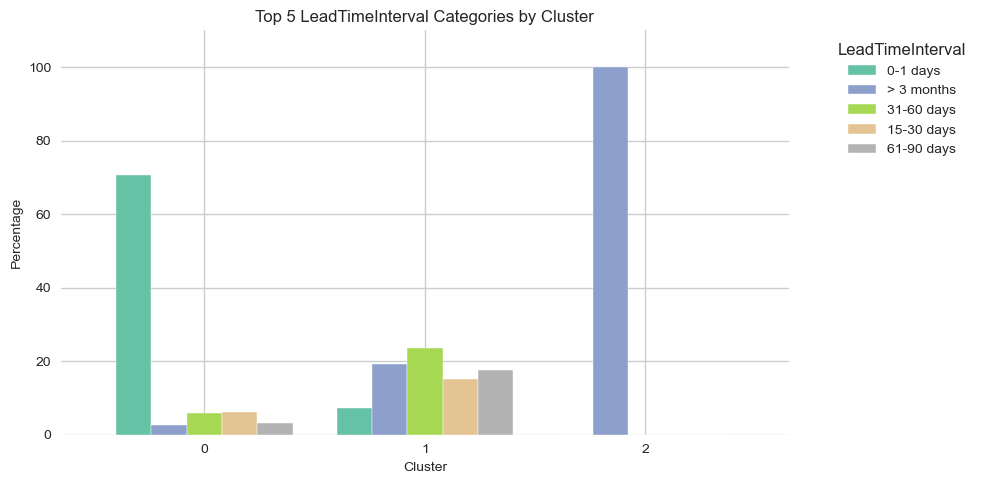

<Figure size 1000x500 with 0 Axes>

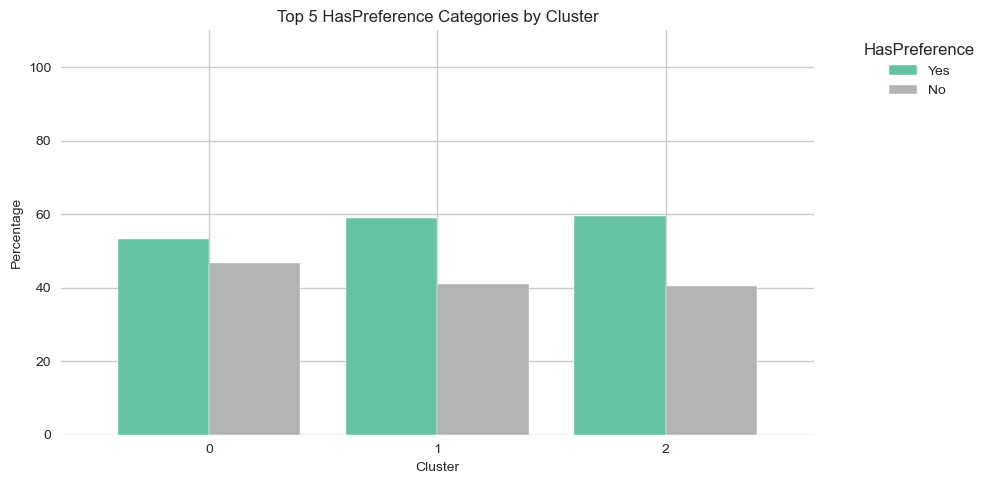

In [582]:
df_km_mf['Cluster'] = kmeans.labels_
df_full = df.join(df_km_mf['Cluster'])

categorical_features = ['Nationality', 'Region', 'DistributionChannel', 'RoomRate_cat', 'AgeGroup', 'LeadTimeInterval', 'HasPreference']
top_n = 5 

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    
    cluster_counts = df_full.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    
    top_categories = df_full[feature].value_counts().index[:top_n]
    cluster_counts = cluster_counts[top_categories]
    
    cluster_counts = cluster_counts * 100
    
    cluster_counts.plot(kind='bar', colormap='Set2', figsize=(10, 5), width=0.8)
    
    plt.title(f'Top {top_n} {feature} Categories by Cluster')
    plt.ylabel('Percentage')
    plt.xlabel('Cluster')
    plt.xticks(rotation=0)
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    sns.despine(bottom=True, left=True)
    plt.ylim(0,110)
    plt.show()

The silhouette score indicated a good clustering structure (0.51). The Davies-Bouldin score (0.816) suggested that the clusters were compact and well-separated, with a lower score being better. The Calinski-Harabasz score (108275.159) was very high, suggesting high intra-cluster density and good separation. The R² score (0.97) suggested that 97% of the variance was explained, meaning that the clusters captured most of the structure of the data. Clusters 0 and 1 were of similar size, while Cluster 2 was slightly smaller, indicating that the model had clustered an even number of customers naturally.

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 8. Clusters Analysis and Recommendations
    

</div>

### Cluster 0 (On-the-budget quick bookers)
The customers from this cluster had the shortest Average Lead Time (0-1 days), meaning they book very close to their arrival date. They had the lowest revenue generation overall and they tippically book rooms for fewer people relative to the room capacity. The low PersonNights value suggests shorter stays or less people in the same booking, meaning they payed less per room (lower RoomRate). The majority of these customers were from Western (38%) and Southern Europe (20%) with the largest proportion from France (14%), Germany (13%), Great Britain (10%).

#### Client Strategy
In this cluster there are two types of customeres: those with no total bookings (leads) and those with past bookings.

**For leads:**<br>
The hotel should offer discounts for first-time bookings made directly through its website or by contacting the hotel. This approach could provide better deals and encourage direct reservations, cutting out "the middleman" which translates into bigger margins.<br>

**For the customers with bookings:**<br>
These customers reserve last-minute budget alternatives, the hotel can maximize bookings by introducing time-limited (e.g. 24–48 hours) flash-sale promotions 1–2 times per month. These promotions will offer discounted room prices that will be available only within the duration of the flash sale. This approach makes travel more affordable for last-minute bookers, encourages direct bookings—which, once again, eliminates commission fees and reduces dependency on third-party travel agents—and enables the hotel to target marketing effectively. In addition, the hotel can schedule notifications and flash-sale alerts when local times peak so that promotions are seen during the most favorable times for conversion. 

### Cluster 1 (Moderate planners)
These customers booked with moderate planning time (31-60 days in advance). They have higher revenue generation compared to Cluster 0, a higher `NPeoplePerRoom` and `PersonNights`, meaning they maximize room occupancy by bringing more people who could be staying longer. They have the highest RoomRate meaning they pay more for their accomodations. Much like the previous cluster, the majority originated from Western (40%) and Southern Europe (22%) with the largest proportion of clients hailing from France (18%), Portugal (10%), Germany (10%).

#### Client Strategy
Since these customers plan ahead but not too far in advance, the hotel can incentivize early bookings by offering discounts on additional nights for extended stays. Targeted emails should emphasize the benefits of booking early, such as securing the best available rates. However, this approach requires caution, as too many emails can be perceived as spam and create a negative association with the hotel. Additionally, region-specific promotions should be developed to ensure that marketing messages resonate with key markets (France, Portugal, Germany).

### Cluster 2 (Long-Term Senior Planners)
The customers from this cluster booked far in advance (highest average Lead Time: more than 3 months). The revenue generated was similar to Cluster 1 and the booking patterns were also quite similar. However, `NPeoplePerRoom` and `RoomRate` values were slightly lower. Most customers were from Western Europe (50%) and Southern Europe (21%) with the largest proportion being from Germany (25%), Great-Britain (10%), France (12%). While the Distribution Channel categories were very similar in all clusters, Cluster 2 showed a slight increase in `Travel Agent/Operator`.

Regarding the `HasPreference` variable, there was pratically no differences across Clusters, making it useless for segmentation.

#### Client Strategy
Since these customers naturally book far in advance, the hotel should encourage direct early bookings by offering guaranteed best rates for reservations made at least 3 months in advance and providing flexible cancellation policies to offer reassurance. This approach rewards customers for booking early while reducing reliance on third-party travel agents. Given that many travelers in this cluster are older guests, the hotel can further enhance their experience by offering senior-friendly amenities, such as quiet room locations, accessible facilities, and wellness programs to ensure comfort and satisfaction.